In [1]:
import pandas as pd
import numpy as np
from optuna.integration import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import japanize_matplotlib
import optuna.integration.lightgbm as lgb_tune
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("data/suumo_dum.csv")

In [3]:
df.head()

,price,age,manage,sikikin,reikin,deposit,sikibiki,bus,walk,time,...,address_東京都江戸川区平井５,address_東京都江戸川区平井６,address_東京都江戸川区平井７,address_東京都江東区亀戸２,address_東京都江東区亀戸３,address_東京都江東区亀戸４,address_東京都江東区亀戸５,address_東京都葛飾区立石２,address_東京都葛飾区西新小岩５,name
0,4.40,35.0,0.0,0.0,0.0,0.0,0.0,0,1,10.0,...,0,0,0,0,0,0,0,1,0,グラン立石
1,4.40,35.0,0.0,0.0,0.0,0.0,0.0,0,1,10.0,...,0,0,0,0,0,0,0,1,0,グラン立石
2,10.45,13.0,6000.0,0.0,1.0,0.0,0.0,0,1,6.0,...,0,0,0,0,0,0,0,0,0,グレイス・コート
3,10.45,13.0,6000.0,0.0,1.0,0.0,0.0,0,1,6.0,...,0,0,0,0,0,0,0,0,0,東京メトロ半蔵門線 押上駅 6階建 築13年
4,8.60,13.0,4000.0,0.0,1.0,0.0,0.0,0,1,7.0,...,0,0,0,0,0,0,0,0,0,東京メトロ半蔵門線 押上駅 4階建 築13年


In [4]:
df = df.drop("name",axis=1)

データをトレーニング用データと検証用データに分割する

In [5]:
train, test = train_test_split(df, random_state=10, test_size=0.20)

In [6]:
X = train[[col for col in train.columns if col not in ['price']]]
y = train["price"]
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=10, test_size=0.20)

In [7]:
trains = lgb.Dataset(X_train, y_train)
valids = lgb.Dataset(X_val, y_val, reference=trains)

In [8]:
params = {
        'boosting_type': 'gbdt',
        'objective': 'regression',
        'metric': 'rmse'
}


model_tune = lgb_tune.train(
    params, trains, valid_sets=[trains, valids], 
    num_boost_round=5000,
    verbose_eval=100, 
    early_stopping_rounds=100
)

[I 2022-01-31 10:03:15,575] A new study created in memory with name: no-name-21ce266e-7467-4f0b-a0cc-4f918ec40693
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.360709	valid_1's rmse: 0.397594
[200]	valid_0's rmse: 0.285319	valid_1's rmse: 0.345335
[300]	valid_0's rmse: 0.251092	valid_1's rmse: 0.325198
[400]	valid_0's rmse: 0.23296	valid_1's rmse: 0.31539
[500]	valid_0's rmse: 0.220995	valid_1's rmse: 0.310468
[600]	valid_0's rmse: 0.211693	valid_1's rmse: 0.307777
[700]	valid_0's rmse: 0.20514	valid_1's rmse: 0.305502
[800]	valid_0's rmse: 0.199882	valid_1's rmse: 0.303595
[900]	valid_0's rmse: 0.196089	valid_1's rmse: 0.302613
[1000]	valid_0's rmse: 0.19

feature_fraction, val_score: 0.299604:  14%|#4        | 1/7 [00:02<00:13,  2.25s/it]

[1900]	valid_0's rmse: 0.180893	valid_1's rmse: 0.299682
Early stopping, best iteration is:
[1806]	valid_0's rmse: 0.181539	valid_1's rmse: 0.299604
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.393259	valid_1's rmse: 0.412137
[200]	valid_0's rmse: 0.31896	valid_1's rmse: 0.359186
[300]	valid_0's rmse: 0.283672	valid_1's rmse: 0.341218
[400]	valid_0's rmse: 0.261153	valid_1's rmse: 0.329688
[500]	valid_0's rmse: 0.245435	valid_1's rmse: 0.322444
[600]	valid_0's rmse: 0.233853	valid_1's rmse: 0.316386
[700]	valid_0's rmse: 0.225396	valid_1's rms

feature_fraction, val_score: 0.296411:  29%|##8       | 2/7 [00:05<00:13,  2.63s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.362132	valid_1's rmse: 0.396049
[200]	valid_0's rmse: 0.291022	valid_1's rmse: 0.343454
[300]	valid_0's rmse: 0.257152	valid_1's rmse: 0.323086
[400]	valid_0's rmse: 0.237738	valid_1's rmse: 0.31264
[500]	valid_0's rmse: 0.224652	valid_1's rmse: 0.306834
[600]	valid_0's rmse: 0.215666	valid_1's rmse: 0.302933
[700]	valid_0's rmse: 0.208656	valid_1's rmse: 0.300998
[800]	valid_0's rmse: 0.203277	valid_1's rmse: 0.29854
[900]	valid_0's rmse: 0.199257	valid_1's rmse: 0.29649
[1000]	valid_0's rmse: 0.19

feature_fraction, val_score: 0.292208:  43%|####2     | 3/7 [00:07<00:09,  2.28s/it]

Early stopping, best iteration is:
[1589]	valid_0's rmse: 0.184727	valid_1's rmse: 0.292208
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.373046	valid_1's rmse: 0.398496
[200]	valid_0's rmse: 0.302914	valid_1's rmse: 0.348143
[300]	valid_0's rmse: 0.269633	valid_1's rmse: 0.329169
[400]	valid_0's rmse: 0.248938	valid_1's rmse: 0.318674
[500]	valid_0's rmse: 0.234818	valid_1's rmse: 0.31192
[600]	valid_0's rmse: 0.224984	valid_1's rmse: 0.307095
[700]	valid_0's rmse: 0.217508	valid_1's rmse: 0.303882
[800]	valid_0's rmse: 0.211617	valid_1's rmse

feature_fraction, val_score: 0.292114:  57%|#####7    | 4/7 [00:09<00:07,  2.56s/it]

[2100]	valid_0's rmse: 0.184075	valid_1's rmse: 0.292158
Early stopping, best iteration is:
[2013]	valid_0's rmse: 0.184773	valid_1's rmse: 0.292114
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.360627	valid_1's rmse: 0.40137
[200]	valid_0's rmse: 0.287552	valid_1's rmse: 0.347937
[300]	valid_0's rmse: 0.253435	valid_1's rmse: 0.326245
[400]	valid_0's rmse: 0.234741	valid_1's rmse: 0.315627
[500]	valid_0's rmse: 0.22168	valid_1's rmse: 0.309711
[600]	valid_0's rmse: 0.212586	valid_1's rmse: 0.30547
[700]	valid_0's rmse: 0.205647	valid_1's rmse:

feature_fraction, val_score: 0.292114:  71%|#######1  | 5/7 [00:12<00:05,  2.64s/it]

[2200]	valid_0's rmse: 0.179662	valid_1's rmse: 0.293585
Early stopping, best iteration is:
[2155]	valid_0's rmse: 0.179897	valid_1's rmse: 0.293504
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000796 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.367216	valid_1's rmse: 0.399138
[200]	valid_0's rmse: 0.295329	valid_1's rmse: 0.346312
[300]	valid_0's rmse: 0.262771	valid_1's rmse: 0.324764
[400]	valid_0's rmse: 0.242763	valid_1's rmse: 0.313481
[500]	valid_0's rmse: 0.229399	valid_1's rmse: 0.307556
[600]	valid_0's rmse: 0.219962	valid_1's rmse: 0.303457
[700]	valid_0's rmse: 0.212505	valid_1's rm

feature_fraction, val_score: 0.292114:  86%|########5 | 6/7 [00:15<00:02,  2.73s/it]

Early stopping, best iteration is:
[1734]	valid_0's rmse: 0.185534	valid_1's rmse: 0.292337
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.365093	valid_1's rmse: 0.399632
[200]	valid_0's rmse: 0.291824	valid_1's rmse: 0.340883
[300]	valid_0's rmse: 0.259408	valid_1's rmse: 0.320386
[400]	valid_0's rmse: 0.239818	valid_1's rmse: 0.309521
[500]	valid_0's rmse: 0.227296	valid_1's rmse: 0.30328
[600]	valid_0's rmse: 0.217614	valid_1's rmse: 0.29887
[700]	valid_0's rmse: 0.210378	valid_1's rmse: 0.296701
[800]	valid_0's rmse: 0.204827	valid_1's rmse:

num_leaves, val_score: 0.288172:   0%|          | 0/20 [00:00<?, ?it/s]

[1800]	valid_0's rmse: 0.18362	valid_1's rmse: 0.288238
Early stopping, best iteration is:
[1737]	valid_0's rmse: 0.1842	valid_1's rmse: 0.288172
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000909 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.294673	valid_1's rmse: 0.349888
[200]	valid_0's rmse: 0.240818	valid_1's rmse: 0.314255
[300]	valid_0's rmse: 0.218555	valid_1's rmse: 0.303289
[400]	valid_0's rmse: 0.205613	valid_1's rmse: 0.298578
[500]	valid_0's rmse: 0.197614	valid_1's rmse: 0.296607
[600]	valid_0's rmse: 0.192055	valid_1's rmse: 0.295346
[700]	valid_0's rmse: 0.18835	valid_1's rmse: 

num_leaves, val_score: 0.288172:   5%|5         | 1/20 [00:02<00:41,  2.18s/it]

[1100]	valid_0's rmse: 0.180751	valid_1's rmse: 0.293334
Early stopping, best iteration is:
[1048]	valid_0's rmse: 0.181327	valid_1's rmse: 0.293271
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.233785	valid_1's rmse: 0.329339
[200]	valid_0's rmse: 0.200622	valid_1's rmse: 0.310962
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[300]	valid_0's rmse: 0.188308	valid_1's rmse: 0.30527
[400]	valid_0's rmse: 0.182374	valid_1's rmse: 0.303254
[500]	valid_0's rmse: 0.179479	valid_1's rmse: 0.302245
[600]	valid_0's rmse: 0.1

num_leaves, val_score: 0.288172:  10%|#         | 2/20 [00:06<01:00,  3.38s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.277338	valid_1's rmse: 0.345449
[200]	valid_0's rmse: 0.230069	valid_1's rmse: 0.316856
[300]	valid_0's rmse: 0.209893	valid_1's rmse: 0.307965
[400]	valid_0's rmse: 0.198371	valid_1's rmse: 0.303762
[500]	valid_0's rmse: 0.191553	valid_1's rmse: 0.301609
[600]	valid_0's rmse: 0.187425	valid_1's rmse: 0.300731
[700]	valid_0's rmse: 0.184406	valid_1's rmse: 0.300567
[800]	valid_0's rmse: 0.182344	valid_1's rmse: 0.300419
[900]	valid_0's rmse: 0.180751	valid_1's rmse: 0.300224
[1000]	valid_0's rmse: 0

num_leaves, val_score: 0.288172:  15%|#5        | 3/20 [00:09<00:53,  3.17s/it]

Early stopping, best iteration is:
[1117]	valid_0's rmse: 0.178512	valid_1's rmse: 0.300124
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000783 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.24791	valid_1's rmse: 0.332729
[200]	valid_0's rmse: 0.209149	valid_1's rmse: 0.311589
[300]	valid_0's rmse: 0.194208	valid_1's rmse: 0.304948
[400]	valid_0's rmse: 0.186758	valid_1's rmse: 0.303364
[500]	valid_0's rmse: 0.182692	valid_1's rmse: 0.30255
[600]	valid_0's rmse: 0.18014	valid_1's rmse: 0.302143
[700]	valid_0's rmse: 0.178549	valid_1's rmse: 0.302099
[800]	valid_0's rmse: 0.177468	valid_1's rmse: 

num_leaves, val_score: 0.288172:  20%|##        | 4/20 [00:13<00:54,  3.40s/it]

[900]	valid_0's rmse: 0.176727	valid_1's rmse: 0.301947
Early stopping, best iteration is:
[816]	valid_0's rmse: 0.177327	valid_1's rmse: 0.301884
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000820 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.285057	valid_1's rmse: 0.3493
[200]	valid_0's rmse: 0.235545	valid_1's rmse: 0.318498
[300]	valid_0's rmse: 0.21345	valid_1's rmse: 0.308091
[400]	valid_0's rmse: 0.201152	valid_1's rmse: 0.303837
[500]	valid_0's rmse: 0.19396	valid_1's rmse: 0.301218
[600]	valid_0's rmse: 0.189151	valid_1's rmse: 0.300213
[700]	valid_0's rmse: 0.185972	valid_1's rmse: 0.

num_leaves, val_score: 0.288172:  25%|##5       | 5/20 [00:15<00:47,  3.18s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	valid_0's rmse: 0.231323	valid_1's rmse: 0.327437
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

num_leaves, val_score: 0.288172:  30%|###       | 6/20 [00:21<00:53,  3.86s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.272561	valid_1's rmse: 0.343671
[200]	valid_0's rmse: 0.226567	valid_1's rmse: 0.316426
[300]	valid_0's rmse: 0.207038	valid_1's rmse: 0.307475
[400]	valid_0's rmse: 0.19617	valid_1's rmse: 0.303514
[500]	valid_0's rmse: 0.189923	valid_1's rmse: 0.30206
[600]	valid_0's rmse: 0.185678	valid_1's rmse: 0.301096
[700]	valid_0's rmse: 0.183045	valid_1's rmse: 0.301005
[800]	valid_0's rmse: 0.181143	valid_1's rmse: 0.300924
[900]	valid_0's rmse: 0.179649	valid_1's rmse: 0.300807


num_leaves, val_score: 0.288172:  35%|###5      | 7/20 [00:23<00:44,  3.41s/it]

[1000]	valid_0's rmse: 0.178608	valid_1's rmse: 0.300823
Early stopping, best iteration is:
[930]	valid_0's rmse: 0.179295	valid_1's rmse: 0.300701
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.280571	valid_1's rmse: 0.341886
[200]	valid_0's rmse: 0.231777	valid_1's rmse: 0.312885
[300]	valid_0's rmse: 0.210755	valid_1's rmse: 0.302852
[400]	valid_0's rmse: 0.198974	valid_1's rmse: 0.299448
[500]	valid_0's rmse: 0.192469	valid_1's rmse: 0.297707
[600]	valid_0's rmse: 0.187952	valid_1's rmse: 0.296699
[700]	valid_0's rmse: 0.184998	valid_1's rms

num_leaves, val_score: 0.288172:  40%|####      | 8/20 [00:25<00:36,  3.03s/it]

[1000]	valid_0's rmse: 0.179865	valid_1's rmse: 0.295711
Early stopping, best iteration is:
[918]	valid_0's rmse: 0.180893	valid_1's rmse: 0.295484
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.308014	valid_1's rmse: 0.357392
[200]	valid_0's rmse: 0.249434	valid_1's rmse: 0.321786
[300]	valid_0's rmse: 0.224879	valid_1's rmse: 0.309431
[400]	valid_0's rmse: 0.211037	valid_1's rmse: 0.304155
[500]	valid_0's rmse: 0.202405	valid_1's rmse: 0.300834
[600]	valid_0's rmse: 0.196032	valid_1's rmse: 0.298485
[700]	valid_0's rmse: 0.191803	valid_1's rms

num_leaves, val_score: 0.288172:  45%|####5     | 9/20 [00:27<00:30,  2.73s/it]

Early stopping, best iteration is:
[1159]	valid_0's rmse: 0.181857	valid_1's rmse: 0.295203
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.232233	valid_1's rmse: 0.325696
[200]	valid_0's rmse: 0.199834	valid_1's rmse: 0.310124
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[300]	valid_0's rmse: 0.187748	valid_1's rmse: 0.304544
[400]	valid_0's rmse: 0.182054	valid_1's rmse: 0.302674
[500]	valid_0's rmse: 0.17923	valid_1's rmse: 0.302024
[600]	valid_0's rmse: 0.177565	valid_1's rmse: 0.3014
[LightGBM] [Warning] No furt

num_leaves, val_score: 0.288172:  50%|#####     | 10/20 [00:32<00:32,  3.29s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[700]	valid_0's rmse: 0.17655	valid_1's rmse: 0.301402
Early stopping, best iteration is:
[605]	valid_0's rmse: 0.177516	valid_1's rmse: 0.301365
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.510838	valid_1's rmse: 0.522465
[200]	valid_0's rmse: 0.421425	valid_1's rmse: 0.44145
[300]	valid_0's rmse: 0.372191	valid_1's rmse: 0.401841
[400]	valid_0's rmse: 0.338025	valid_1's rmse: 0.377137
[500]	valid_0's rmse: 0.314329	valid_1's rmse: 0.360873
[600]	valid_0's rmse: 0.2967

num_leaves, val_score: 0.288172:  55%|#####5    | 11/20 [00:34<00:25,  2.89s/it]

[3200]	valid_0's rmse: 0.198414	valid_1's rmse: 0.307707
[3300]	valid_0's rmse: 0.197408	valid_1's rmse: 0.307724
Early stopping, best iteration is:
[3222]	valid_0's rmse: 0.198177	valid_1's rmse: 0.307587
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000826 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.493957	valid_1's rmse: 0.505593
[200]	valid_0's rmse: 0.407816	valid_1's rmse: 0.428473
[300]	valid_0's rmse: 0.358031	valid_1's rmse: 0.388794
[400]	valid_0's rmse: 0.32624	valid_1's rmse: 0.366935
[500]	valid_0's rmse: 0.303595	valid_1's rmse: 0.353714
[600]	valid_0's rmse: 0.286437	valid_1's rm

num_leaves, val_score: 0.288172:  60%|######    | 12/20 [00:37<00:22,  2.82s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.243425	valid_1's rmse: 0.331522
[200]	valid_0's rmse: 0.206623	valid_1's rmse: 0.311297
[300]	valid_0's rmse: 0.192649	valid_1's rmse: 0.305501
[400]	valid_0's rmse: 0.185356	valid_1's rmse: 0.303288
[500]	valid_0's rmse: 0.181504	valid_1's rmse: 0.302414
[600]	valid_0's rmse: 0.179244	valid_1's rmse: 0.301989
[700]	valid_0's rmse: 0.177836	valid_1's rmse: 0.301873
[800]	valid_0's rmse: 0.176893	valid_1's rmse: 0.301707


num_leaves, val_score: 0.288172:  65%|######5   | 13/20 [00:40<00:21,  3.07s/it]

Early stopping, best iteration is:
[791]	valid_0's rmse: 0.176959	valid_1's rmse: 0.301667
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.343176	valid_1's rmse: 0.381335
[200]	valid_0's rmse: 0.276553	valid_1's rmse: 0.333975
[300]	valid_0's rmse: 0.247591	valid_1's rmse: 0.317426
[400]	valid_0's rmse: 0.230106	valid_1's rmse: 0.308863
[500]	valid_0's rmse: 0.218036	valid_1's rmse: 0.303338
[600]	valid_0's rmse: 0.209675	valid_1's rmse: 0.30008
[700]	valid_0's rmse: 0.203193	valid_1's rmse: 0.297393
[800]	valid_0's rmse: 0.198579	valid_1's rmse:

num_leaves, val_score: 0.288172:  70%|#######   | 14/20 [00:43<00:17,  2.88s/it]

Early stopping, best iteration is:
[1788]	valid_0's rmse: 0.180942	valid_1's rmse: 0.291687
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.250784	valid_1's rmse: 0.333052
[200]	valid_0's rmse: 0.211177	valid_1's rmse: 0.312236
[300]	valid_0's rmse: 0.195457	valid_1's rmse: 0.304488
[400]	valid_0's rmse: 0.187517	valid_1's rmse: 0.301782
[500]	valid_0's rmse: 0.183156	valid_1's rmse: 0.300138
[600]	valid_0's rmse: 0.180437	valid_1's rmse: 0.299566
[700]	valid_0's rmse: 0.178781	valid_1's rmse: 0.29916
[800]	valid_0's rmse: 0.177644	valid_1's rmse

num_leaves, val_score: 0.288172:  75%|#######5  | 15/20 [00:46<00:14,  2.97s/it]

Early stopping, best iteration is:
[756]	valid_0's rmse: 0.178101	valid_1's rmse: 0.299012
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.405407	valid_1's rmse: 0.435908
[200]	valid_0's rmse: 0.32339	valid_1's rmse: 0.371157
[300]	valid_0's rmse: 0.285776	valid_1's rmse: 0.34471
[400]	valid_0's rmse: 0.261976	valid_1's rmse: 0.329885
[500]	valid_0's rmse: 0.245967	valid_1's rmse: 0.320257
[600]	valid_0's rmse: 0.235138	valid_1's rmse: 0.314273
[700]	valid_0's rmse: 0.226411	valid_1's rmse: 0.310029
[800]	valid_0's rmse: 0.220113	valid_1's rmse: 

num_leaves, val_score: 0.288172:  80%|########  | 16/20 [00:48<00:11,  2.87s/it]

Early stopping, best iteration is:
[2995]	valid_0's rmse: 0.181426	valid_1's rmse: 0.29363
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.238177	valid_1's rmse: 0.325888
[200]	valid_0's rmse: 0.202925	valid_1's rmse: 0.306553
[300]	valid_0's rmse: 0.189652	valid_1's rmse: 0.301014
[400]	valid_0's rmse: 0.183435	valid_1's rmse: 0.299495
[500]	valid_0's rmse: 0.180193	valid_1's rmse: 0.298615
[600]	valid_0's rmse: 0.17833	valid_1's rmse: 0.298149
[700]	valid_0's rmse: 0.177127	valid_1's rmse: 0.298049
[800]	valid_0's rmse: 0.176328	valid_1's rmse:

num_leaves, val_score: 0.288172:  85%|########5 | 17/20 [00:53<00:10,  3.53s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.343176	valid_1's rmse: 0.381335
[200]	valid_0's rmse: 0.276553	valid_1's rmse: 0.333975
[300]	valid_0's rmse: 0.247591	valid_1's rmse: 0.317426
[400]	valid_0's rmse: 0.230106	valid_1's rmse: 0.308863
[500]	valid_0's rmse: 0.218036	valid_1's rmse: 0.303338
[600]	valid_0's rmse: 0.209675	valid_1's rmse: 0.30008
[700]	valid_0's rmse: 0.203193	valid_1's rmse: 0.297393
[800]	valid_0's rmse: 0.198579	valid_1's rmse: 0.295443
[900]	valid_0's rmse: 0.194971	valid_1's rmse: 0.294577
[1000]	valid_0's rmse: 0.

num_leaves, val_score: 0.288172:  90%|######### | 18/20 [00:56<00:06,  3.16s/it]

[1800]	valid_0's rmse: 0.180859	valid_1's rmse: 0.291719
Early stopping, best iteration is:
[1788]	valid_0's rmse: 0.180942	valid_1's rmse: 0.291687
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000877 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.256616	valid_1's rmse: 0.337467
[200]	valid_0's rmse: 0.215195	valid_1's rmse: 0.315136
[300]	valid_0's rmse: 0.19878	valid_1's rmse: 0.30802
[400]	valid_0's rmse: 0.190042	valid_1's rmse: 0.304352
[500]	valid_0's rmse: 0.185103	valid_1's rmse: 0.303296
[600]	valid_0's rmse: 0.182043	valid_1's rmse: 0.302671
[700]	valid_0's rmse: 0.180062	valid_1's rmse

num_leaves, val_score: 0.288172:  95%|#########5| 19/20 [00:58<00:02,  2.94s/it]

[800]	valid_0's rmse: 0.178624	valid_1's rmse: 0.30251
Early stopping, best iteration is:
[733]	valid_0's rmse: 0.179531	valid_1's rmse: 0.302406
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.34176	valid_1's rmse: 0.380612
[200]	valid_0's rmse: 0.278219	valid_1's rmse: 0.337057
[300]	valid_0's rmse: 0.247339	valid_1's rmse: 0.31874
[400]	valid_0's rmse: 0.229473	valid_1's rmse: 0.310085
[500]	valid_0's rmse: 0.218428	valid_1's rmse: 0.304575
[600]	valid_0's rmse: 0.210164	valid_1's rmse: 0.300171
[700]	valid_0's rmse: 0.204069	valid_1's rmse: 0

bagging, val_score: 0.288172:   0%|          | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.362528	valid_1's rmse: 0.397287
[200]	valid_0's rmse: 0.291552	valid_1's rmse: 0.346891
[300]	valid_0's rmse: 0.259118	valid_1's rmse: 0.327283
[400]	valid_0's rmse: 0.239333	valid_1's rmse: 0.317106
[500]	valid_0's rmse: 0.225129	valid_1's rmse: 0.311269
[600]	valid_0's rmse: 0.215554	valid_1's rmse: 0.307061
[700]	valid_0's rmse: 0.208594	valid_1's rmse: 0.304128
[800]	valid_0's rmse: 0.203137	valid_1's rmse: 0.302269
[900]	valid_0's rmse: 0.198796	valid_1's rmse: 0.30125
[1000]	valid_0's rmse: 0.

bagging, val_score: 0.288172:  10%|#         | 1/10 [00:02<00:25,  2.79s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.372451	valid_1's rmse: 0.400502
[200]	valid_0's rmse: 0.297358	valid_1's rmse: 0.343966
[300]	valid_0's rmse: 0.264488	valid_1's rmse: 0.323849
[400]	valid_0's rmse: 0.243673	valid_1's rmse: 0.313677
[500]	valid_0's rmse: 0.229437	valid_1's rmse: 0.305679
[600]	valid_0's rmse: 0.219199	valid_1's rmse: 0.301493
[700]	valid_0's rmse: 0.211996	valid_1's rmse: 0.298704
[800]	valid_0's rmse: 0.20648	valid_1's rmse: 0.296402
[900]	valid_0's rmse: 0.201887	valid_1's rmse: 0.294484
[1000]	valid_0's rmse: 0.

bagging, val_score: 0.288172:  20%|##        | 2/10 [00:05<00:21,  2.70s/it]

Early stopping, best iteration is:
[1697]	valid_0's rmse: 0.186306	valid_1's rmse: 0.288792
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.385957	valid_1's rmse: 0.413435
[200]	valid_0's rmse: 0.310217	valid_1's rmse: 0.358413
[300]	valid_0's rmse: 0.275685	valid_1's rmse: 0.336315
[400]	valid_0's rmse: 0.255091	valid_1's rmse: 0.325306
[500]	valid_0's rmse: 0.239789	valid_1's rmse: 0.316096
[600]	valid_0's rmse: 0.228534	valid_1's rmse: 0.311491
[700]	valid_0's rmse: 0.219596	valid_1's rmse: 0.306373
[800]	valid_0's rmse: 0.213119	valid_1's rms

bagging, val_score: 0.288172:  30%|###       | 3/10 [00:07<00:18,  2.63s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.367038	valid_1's rmse: 0.395486
[200]	valid_0's rmse: 0.292818	valid_1's rmse: 0.344155
[300]	valid_0's rmse: 0.260667	valid_1's rmse: 0.325236
[400]	valid_0's rmse: 0.240427	valid_1's rmse: 0.31575
[500]	valid_0's rmse: 0.227081	valid_1's rmse: 0.308466
[600]	valid_0's rmse: 0.217326	valid_1's rmse: 0.304546
[700]	valid_0's rmse: 0.210072	valid_1's rmse: 0.302345
[800]	valid_0's rmse: 0.204369	valid_1's rmse: 0.30049
[900]	valid_0's rmse: 0.199882	valid_1's rmse: 0.298751
[1000]	valid_0's rmse: 0.1

bagging, val_score: 0.288172:  40%|####      | 4/10 [00:10<00:16,  2.72s/it]

Early stopping, best iteration is:
[1665]	valid_0's rmse: 0.184995	valid_1's rmse: 0.294275
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.371638	valid_1's rmse: 0.393533
[200]	valid_0's rmse: 0.297384	valid_1's rmse: 0.341868
[300]	valid_0's rmse: 0.26413	valid_1's rmse: 0.324479
[400]	valid_0's rmse: 0.243144	valid_1's rmse: 0.314383
[500]	valid_0's rmse: 0.228865	valid_1's rmse: 0.307313
[600]	valid_0's rmse: 0.218804	valid_1's rmse: 0.302625
[700]	valid_0's rmse: 0.211295	valid_1's rmse: 0.300178
[800]	valid_0's rmse: 0.205603	valid_1's rmse

bagging, val_score: 0.288172:  50%|#####     | 5/10 [00:13<00:14,  2.82s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.371778	valid_1's rmse: 0.399108
[200]	valid_0's rmse: 0.299395	valid_1's rmse: 0.342296
[300]	valid_0's rmse: 0.265461	valid_1's rmse: 0.323486
[400]	valid_0's rmse: 0.243638	valid_1's rmse: 0.313838
[500]	valid_0's rmse: 0.229608	valid_1's rmse: 0.307974
[600]	valid_0's rmse: 0.219494	valid_1's rmse: 0.303823
[700]	valid_0's rmse: 0.212026	valid_1's rmse: 0.301384
[800]	valid_0's rmse: 0.206367	valid_1's rmse: 0.298943
[900]	valid_0's rmse: 0.201454	valid_1's rmse: 0.297463
[1000]	valid_0's rmse: 0

bagging, val_score: 0.288172:  60%|######    | 6/10 [00:16<00:10,  2.71s/it]

[1300]	valid_0's rmse: 0.190643	valid_1's rmse: 0.295321
Early stopping, best iteration is:
[1281]	valid_0's rmse: 0.190994	valid_1's rmse: 0.294687
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.367016	valid_1's rmse: 0.398632
[200]	valid_0's rmse: 0.29288	valid_1's rmse: 0.344158
[300]	valid_0's rmse: 0.260833	valid_1's rmse: 0.326146
[400]	valid_0's rmse: 0.24015	valid_1's rmse: 0.31538
[500]	valid_0's rmse: 0.226505	valid_1's rmse: 0.309112
[600]	valid_0's rmse: 0.216669	valid_1's rmse: 0.304512
[700]	valid_0's rmse: 0.20917	valid_1's rmse: 

bagging, val_score: 0.288172:  70%|#######   | 7/10 [00:19<00:08,  2.87s/it]

[2000]	valid_0's rmse: 0.181769	valid_1's rmse: 0.293854
Early stopping, best iteration is:
[1936]	valid_0's rmse: 0.182159	valid_1's rmse: 0.293711
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000817 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.384061	valid_1's rmse: 0.415514
[200]	valid_0's rmse: 0.307162	valid_1's rmse: 0.356947
[300]	valid_0's rmse: 0.273505	valid_1's rmse: 0.334901
[400]	valid_0's rmse: 0.251601	valid_1's rmse: 0.322904
[500]	valid_0's rmse: 0.236528	valid_1's rmse: 0.315513
[600]	valid_0's rmse: 0.225556	valid_1's rmse: 0.311165
[700]	valid_0's rmse: 0.217916	valid_1's rm

bagging, val_score: 0.288172:  80%|########  | 8/10 [00:21<00:05,  2.70s/it]

[1500]	valid_0's rmse: 0.191487	valid_1's rmse: 0.301112
Early stopping, best iteration is:
[1413]	valid_0's rmse: 0.192772	valid_1's rmse: 0.300619
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.364848	valid_1's rmse: 0.400481
[200]	valid_0's rmse: 0.291504	valid_1's rmse: 0.347624
[300]	valid_0's rmse: 0.257954	valid_1's rmse: 0.32694
[400]	valid_0's rmse: 0.238444	valid_1's rmse: 0.316438
[500]	valid_0's rmse: 0.224914	valid_1's rmse: 0.310752
[600]	valid_0's rmse: 0.21577	valid_1's rmse: 0.306779
[700]	valid_0's rmse: 0.208754	valid_1's rmse

bagging, val_score: 0.288172:  90%|######### | 9/10 [00:24<00:02,  2.54s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000751 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.379357	valid_1's rmse: 0.402469
[200]	valid_0's rmse: 0.308836	valid_1's rmse: 0.351176
[300]	valid_0's rmse: 0.274315	valid_1's rmse: 0.330291
[400]	valid_0's rmse: 0.25158	valid_1's rmse: 0.318797
[500]	valid_0's rmse: 0.237073	valid_1's rmse: 0.314128
[600]	valid_0's rmse: 0.226635	valid_1's rmse: 0.309012
[700]	valid_0's rmse: 0.218478	valid_1's rmse: 0.305874
[800]	valid_0's rmse: 0.212095	valid_1's rmse: 0.304117
[900]	valid_0's rmse: 0.207034	valid_1's rmse: 0.30313
[1000]	valid_0's rmse: 0.2

feature_fraction_stage2, val_score: 0.288172:   0%|          | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.367593	valid_1's rmse: 0.405852
[200]	valid_0's rmse: 0.296831	valid_1's rmse: 0.354219
[300]	valid_0's rmse: 0.262426	valid_1's rmse: 0.331222
[400]	valid_0's rmse: 0.241574	valid_1's rmse: 0.319078
[500]	valid_0's rmse: 0.228053	valid_1's rmse: 0.312548
[600]	valid_0's rmse: 0.218327	valid_1's rmse: 0.308164
[700]	valid_0's rmse: 0.211298	valid_1's rmse: 0.305945
[800]	valid_0's rmse: 0.205985	valid_1's rmse: 0.303637
[900]	valid_0's rmse: 0.201623	valid_1's rmse: 0.302099
[1000]	valid_0's rmse: 0

feature_fraction_stage2, val_score: 0.288172:  17%|#6        | 1/6 [00:02<00:10,  2.04s/it]

Early stopping, best iteration is:
[1850]	valid_0's rmse: 0.183923	valid_1's rmse: 0.297128
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001685 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.360549	valid_1's rmse: 0.394225
[200]	valid_0's rmse: 0.289271	valid_1's rmse: 0.33953
[300]	valid_0's rmse: 0.256079	valid_1's rmse: 0.317697
[400]	valid_0's rmse: 0.235827	valid_1's rmse: 0.306487
[500]	valid_0's rmse: 0.223715	valid_1's rmse: 0.299254
[600]	valid_0's rmse: 0.214944	valid_1's rmse: 0.296054
[700]	valid_0's rmse: 0.208183	valid_1's rmse: 0.293278
[800]	valid_0's rmse: 0.202532	valid_1's rmse

feature_fraction_stage2, val_score: 0.285806:  33%|###3      | 2/6 [00:04<00:08,  2.17s/it]

[1900]	valid_0's rmse: 0.181919	valid_1's rmse: 0.285839
Early stopping, best iteration is:
[1862]	valid_0's rmse: 0.182198	valid_1's rmse: 0.285806
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.364276	valid_1's rmse: 0.400762
[200]	valid_0's rmse: 0.294284	valid_1's rmse: 0.346375
[300]	valid_0's rmse: 0.261321	valid_1's rmse: 0.324563
[400]	valid_0's rmse: 0.241398	valid_1's rmse: 0.313893
[500]	valid_0's rmse: 0.227717	valid_1's rmse: 0.306904
[600]	valid_0's rmse: 0.218268	valid_1's rmse: 0.30258
[700]	valid_0's rmse: 0.211275	valid_1's rms

feature_fraction_stage2, val_score: 0.285806:  50%|#####     | 3/6 [00:06<00:06,  2.08s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.365442	valid_1's rmse: 0.400075
[200]	valid_0's rmse: 0.292153	valid_1's rmse: 0.34517
[300]	valid_0's rmse: 0.260432	valid_1's rmse: 0.325172
[400]	valid_0's rmse: 0.240362	valid_1's rmse: 0.313434
[500]	valid_0's rmse: 0.227238	valid_1's rmse: 0.307552
[600]	valid_0's rmse: 0.217646	valid_1's rmse: 0.303307
[700]	valid_0's rmse: 0.21091	valid_1's rmse: 0.300264
[800]	valid_0's rmse: 0.205402	valid_1's rmse: 0.298401
[900]	valid_0's rmse: 0.201041	valid_1's rmse: 0.296789
[1000]	valid_0's rmse: 0.1

feature_fraction_stage2, val_score: 0.285806:  67%|######6   | 4/6 [00:08<00:04,  2.26s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.361359	valid_1's rmse: 0.395882
[200]	valid_0's rmse: 0.289655	valid_1's rmse: 0.344589
[300]	valid_0's rmse: 0.257925	valid_1's rmse: 0.325822
[400]	valid_0's rmse: 0.237494	valid_1's rmse: 0.316635
[500]	valid_0's rmse: 0.22511	valid_1's rmse: 0.311276
[600]	valid_0's rmse: 0.216426	valid_1's rmse: 0.307799
[700]	valid_0's rmse: 0.208975	valid_1's rmse: 0.304861
[800]	valid_0's rmse: 0.2037	valid_1's rmse: 0.30298
[900]	valid_0's rmse: 0.199442	valid_1's rmse: 0.301517
[1000]	valid_0's rmse: 0.196

feature_fraction_stage2, val_score: 0.285806:  83%|########3 | 5/6 [00:10<00:02,  2.19s/it]

Early stopping, best iteration is:
[1879]	valid_0's rmse: 0.18263	valid_1's rmse: 0.296389
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.364592	valid_1's rmse: 0.395401
[200]	valid_0's rmse: 0.292193	valid_1's rmse: 0.341698
[300]	valid_0's rmse: 0.259218	valid_1's rmse: 0.320879
[400]	valid_0's rmse: 0.239887	valid_1's rmse: 0.310854
[500]	valid_0's rmse: 0.226623	valid_1's rmse: 0.303288
[600]	valid_0's rmse: 0.217001	valid_1's rmse: 0.299302
[700]	valid_0's rmse: 0.209601	valid_1's rmse: 0.297043
[800]	valid_0's rmse: 0.204191	valid_1's rmse

regularization_factors, val_score: 0.285806:   0%|          | 0/20 [00:00<?, ?it/s]

Early stopping, best iteration is:
[1741]	valid_0's rmse: 0.183846	valid_1's rmse: 0.290095
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.361759	valid_1's rmse: 0.399277
[200]	valid_0's rmse: 0.289326	valid_1's rmse: 0.344051
[300]	valid_0's rmse: 0.25542	valid_1's rmse: 0.322012
[400]	valid_0's rmse: 0.236135	valid_1's rmse: 0.312245
[500]	valid_0's rmse: 0.223301	valid_1's rmse: 0.305633
[600]	valid_0's rmse: 0.214325	valid_1's rmse: 0.301315
[700]	valid_0's rmse: 0.207545	valid_1's rmse: 0.298718
[800]	valid_0's rmse: 0.202261	valid_1's rmse

regularization_factors, val_score: 0.285806:   5%|5         | 1/20 [00:02<00:39,  2.06s/it]

Early stopping, best iteration is:
[1793]	valid_0's rmse: 0.182598	valid_1's rmse: 0.290862
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.363073	valid_1's rmse: 0.399035
[200]	valid_0's rmse: 0.29083	valid_1's rmse: 0.3441
[300]	valid_0's rmse: 0.258443	valid_1's rmse: 0.322546
[400]	valid_0's rmse: 0.238224	valid_1's rmse: 0.311214
[500]	valid_0's rmse: 0.22531	valid_1's rmse: 0.304713
[600]	valid_0's rmse: 0.216302	valid_1's rmse: 0.300038
[700]	valid_0's rmse: 0.209192	valid_1's rmse: 0.296971
[800]	valid_0's rmse: 0.204007	valid_1's rmse: 0

regularization_factors, val_score: 0.285806:  10%|#         | 2/20 [00:04<00:37,  2.09s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.36055	valid_1's rmse: 0.394225
[200]	valid_0's rmse: 0.289274	valid_1's rmse: 0.339799
[300]	valid_0's rmse: 0.255737	valid_1's rmse: 0.317474
[400]	valid_0's rmse: 0.236756	valid_1's rmse: 0.308081
[500]	valid_0's rmse: 0.223819	valid_1's rmse: 0.302241
[600]	valid_0's rmse: 0.214657	valid_1's rmse: 0.297835
[700]	valid_0's rmse: 0.207614	valid_1's rmse: 0.295323
[800]	valid_0's rmse: 0.202373	valid_1's rmse: 0.293758
[900]	valid_0's rmse: 0.198649	valid_1's rmse: 0.292179
[1000]	valid_0's rmse: 0.

regularization_factors, val_score: 0.285806:  15%|#5        | 3/20 [00:06<00:37,  2.22s/it]

Early stopping, best iteration is:
[2124]	valid_0's rmse: 0.180556	valid_1's rmse: 0.286628
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.362257	valid_1's rmse: 0.398648
[200]	valid_0's rmse: 0.292272	valid_1's rmse: 0.347784
[300]	valid_0's rmse: 0.260899	valid_1's rmse: 0.327929
[400]	valid_0's rmse: 0.242666	valid_1's rmse: 0.318195
[500]	valid_0's rmse: 0.230698	valid_1's rmse: 0.312372
[600]	valid_0's rmse: 0.222731	valid_1's rmse: 0.30867
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[700]	valid_0's rmse: 0.21

regularization_factors, val_score: 0.285806:  20%|##        | 4/20 [00:08<00:32,  2.00s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [W

[100]	valid_0's rmse: 0.361538	valid_1's rmse: 0.399409
[200]	valid_0's rmse: 0.289721	valid_1's rmse: 0.34897
[300]	valid_0's rmse: 0.255967	valid_1's rmse: 0.326858
[400]	valid_0's rmse: 0.237578	valid_1's rmse: 0.317761
[500]	valid_0's rmse: 0.225346	valid_1's rmse: 0.31234
[600]	valid_0's rmse: 0.215575	valid_1's rmse: 0.307482
[700]	valid_0's rmse: 0.208711	valid_1's rmse: 0.304551
[800]	valid_0's rmse: 0.203502	valid_1's rmse: 0.302368
[900]	valid_0's rmse: 0.199029	valid_1's rmse: 0.300503
[1000]	valid_0's rmse: 0.195708	valid_1's rmse: 0.299323
[1100]	valid_0's rmse: 0.193204	valid_1's rmse: 0.298427
[1200]	valid_0's rmse: 0.191098	valid_1's rmse: 0.29745
[1300]	valid_0's rmse: 0.189171	valid_1's rmse: 0.296766
[1400]	valid_0's rmse: 0.187692	valid_1's rmse: 0.29612
[1500]	valid_0's rmse: 0.186289	valid_1's rmse: 0.295807
[1600]	valid_0's rmse: 0.185144	valid_1's rmse: 0.295787
[1700]	valid_0's rmse: 0.184138	valid_1's rmse: 0.295475
[1800]	valid_0's rmse: 0.183111	valid_1's rm

regularization_factors, val_score: 0.285806:  20%|##        | 4/20 [00:10<00:32,  2.00s/it]

[2500]	valid_0's rmse: 0.179098	valid_1's rmse: 0.294665
Early stopping, best iteration is:
[2494]	valid_0's rmse: 0.179118	valid_1's rmse: 0.294619


regularization_factors, val_score: 0.285806:  25%|##5       | 5/20 [00:10<00:34,  2.27s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.36055	valid_1's rmse: 0.394225
[200]	valid_0's rmse: 0.289271	valid_1's rmse: 0.33953
[300]	valid_0's rmse: 0.256079	valid_1's rmse: 0.317697
[400]	valid_0's rmse: 0.235827	valid_1's rmse: 0.306487
[500]	valid_0's rmse: 0.223716	valid_1's rmse: 0.299254
[600]	valid_0's rmse: 0.214944	valid_1's rmse: 0.296054
[700]	valid_0's rmse: 0.208183	valid_1's rmse: 0.293278
[800]	valid_0's rmse: 0.202507	valid_1's rmse: 0.291656
[900]	valid_0's rmse: 0.198331	valid_1's rmse: 0.289925
[1000]	valid_0's rmse: 0.1

regularization_factors, val_score: 0.285806:  30%|###       | 6/20 [00:12<00:29,  2.10s/it]

[1600]	valid_0's rmse: 0.184432	valid_1's rmse: 0.285974
Early stopping, best iteration is:
[1502]	valid_0's rmse: 0.185563	valid_1's rmse: 0.285852
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.364496	valid_1's rmse: 0.400007
[200]	valid_0's rmse: 0.290876	valid_1's rmse: 0.344743
[300]	valid_0's rmse: 0.257911	valid_1's rmse: 0.323821
[400]	valid_0's rmse: 0.238501	valid_1's rmse: 0.313459
[500]	valid_0's rmse: 0.225189	valid_1's rmse: 0.30808
[600]	valid_0's rmse: 0.21577	valid_1's rmse: 0.304183
[700]	valid_0's rmse: 0.208704	valid_1's rmse

regularization_factors, val_score: 0.285806:  35%|###5      | 7/20 [00:14<00:27,  2.09s/it]

[1800]	valid_0's rmse: 0.182955	valid_1's rmse: 0.292629
[1900]	valid_0's rmse: 0.182166	valid_1's rmse: 0.292821
Early stopping, best iteration is:
[1809]	valid_0's rmse: 0.182879	valid_1's rmse: 0.292607
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.361392	valid_1's rmse: 0.396562
[200]	valid_0's rmse: 0.290169	valid_1's rmse: 0.342927
[300]	valid_0's rmse: 0.258496	valid_1's rmse: 0.321114
[400]	valid_0's rmse: 0.239105	valid_1's rmse: 0.310128
[500]	valid_0's rmse: 0.226922	valid_1's rmse: 0.304348
[600]	valid_0's rmse: 0.218091	valid_1's r

regularization_factors, val_score: 0.285806:  40%|####      | 8/20 [00:17<00:26,  2.20s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.36055	valid_1's rmse: 0.394226
[200]	valid_0's rmse: 0.289275	valid_1's rmse: 0.3398
[300]	valid_0's rmse: 0.255737	valid_1's rmse: 0.317474
[400]	valid_0's rmse: 0.236757	valid_1's rmse: 0.308081
[500]	valid_0's rmse: 0.223715	valid_1's rmse: 0.301799
[600]	valid_0's rmse: 0.214125	valid_1's rmse: 0.297663
[700]	valid_0's rmse: 0.207375	valid_1's rmse: 0.295272
[800]	valid_0's rmse: 0.202682	valid_1's rmse: 0.293492
[900]	valid_0's rmse: 0.198664	valid_1's rmse: 0.29187
[1000]	valid_0's rmse: 0.195

regularization_factors, val_score: 0.285806:  45%|####5     | 9/20 [00:19<00:24,  2.21s/it]

[2000]	valid_0's rmse: 0.181216	valid_1's rmse: 0.287626
Early stopping, best iteration is:
[1984]	valid_0's rmse: 0.181321	valid_1's rmse: 0.287581
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.362339	valid_1's rmse: 0.397888
[200]	valid_0's rmse: 0.290803	valid_1's rmse: 0.345677
[300]	valid_0's rmse: 0.259865	valid_1's rmse: 0.326856
[400]	valid_0's rmse: 0.242053	valid_1's rmse: 0.317628
[500]	valid_0's rmse: 0.23039	valid_1's rmse: 0.3122
[600]	valid_0's rmse: 0.222135	valid_1's rmse: 0.308645
[LightGBM] [Warning] No further splits with po

regularization_factors, val_score: 0.285806:  50%|#####     | 10/20 [00:21<00:20,  2.01s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.360462	valid_1's rmse: 0.394434
[200]	valid_0's rmse: 0.289483	valid_1's rmse: 0.341128
[300]	valid_0's rmse: 0.255389	valid_1's rmse: 0.320085
[400]	valid_0's rmse: 0.236139	valid_1's rmse: 0.309938
[500]	valid_0's rmse: 0.223312	valid_1's rmse: 0.305162
[600]	valid_0's rmse: 0.214439	valid_1's rmse: 0.301668
[700]	valid_0's rmse: 0.207676	valid_1's rmse: 0.298047
[800]	valid_0's rmse: 0.202837	valid_1's rmse: 0.296324
[900]	valid_0's rmse: 0.19866	valid_1's rmse: 0.294006
[1000]	valid_0's rmse: 0.

regularization_factors, val_score: 0.285806:  55%|#####5    | 11/20 [00:23<00:19,  2.20s/it]

[2200]	valid_0's rmse: 0.180306	valid_1's rmse: 0.288015
Early stopping, best iteration is:
[2162]	valid_0's rmse: 0.180497	valid_1's rmse: 0.287943
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.360549	valid_1's rmse: 0.394225
[200]	valid_0's rmse: 0.289271	valid_1's rmse: 0.33953
[300]	valid_0's rmse: 0.256079	valid_1's rmse: 0.317697
[400]	valid_0's rmse: 0.235827	valid_1's rmse: 0.306487
[500]	valid_0's rmse: 0.223715	valid_1's rmse: 0.299254
[600]	valid_0's rmse: 0.214944	valid_1's rmse: 0.296054
[700]	valid_0's rmse: 0.208183	valid_1's rms

regularization_factors, val_score: 0.285529:  60%|######    | 12/20 [00:25<00:16,  2.08s/it]

Early stopping, best iteration is:
[1548]	valid_0's rmse: 0.184956	valid_1's rmse: 0.285529
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.360549	valid_1's rmse: 0.394225
[200]	valid_0's rmse: 0.289271	valid_1's rmse: 0.33953
[300]	valid_0's rmse: 0.256079	valid_1's rmse: 0.317697
[400]	valid_0's rmse: 0.235827	valid_1's rmse: 0.306487
[500]	valid_0's rmse: 0.223715	valid_1's rmse: 0.299254
[600]	valid_0's rmse: 0.214944	valid_1's rmse: 0.296054
[700]	valid_0's rmse: 0.208183	valid_1's rmse: 0.293278
[800]	valid_0's rmse: 0.202532	valid_1's rmse

regularization_factors, val_score: 0.285529:  65%|######5   | 13/20 [00:27<00:13,  2.00s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000925 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.360549	valid_1's rmse: 0.394225
[200]	valid_0's rmse: 0.289271	valid_1's rmse: 0.33953
[300]	valid_0's rmse: 0.256079	valid_1's rmse: 0.317697
[400]	valid_0's rmse: 0.235827	valid_1's rmse: 0.306487
[500]	valid_0's rmse: 0.223715	valid_1's rmse: 0.299254
[600]	valid_0's rmse: 0.214944	valid_1's rmse: 0.296054
[700]	valid_0's rmse: 0.208183	valid_1's rmse: 0.293278
[800]	valid_0's rmse: 0.202507	valid_1's rmse: 0.291656
[900]	valid_0's rmse: 0.198331	valid_1's rmse: 0.289925
[1000]	valid_0's rmse: 0.

regularization_factors, val_score: 0.285529:  70%|#######   | 14/20 [00:29<00:12,  2.12s/it]

Early stopping, best iteration is:
[2149]	valid_0's rmse: 0.180321	valid_1's rmse: 0.285752
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001668 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.360549	valid_1's rmse: 0.394225
[200]	valid_0's rmse: 0.289271	valid_1's rmse: 0.33953
[300]	valid_0's rmse: 0.256079	valid_1's rmse: 0.317697
[400]	valid_0's rmse: 0.235827	valid_1's rmse: 0.306487
[500]	valid_0's rmse: 0.223715	valid_1's rmse: 0.299254
[600]	valid_0's rmse: 0.214944	valid_1's rmse: 0.296054
[700]	valid_0's rmse: 0.208183	valid_1's rmse: 0.293278
[800]	valid_0's rmse: 0.202507	valid_1's rmse

regularization_factors, val_score: 0.285529:  75%|#######5  | 15/20 [00:32<00:11,  2.21s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.362613	valid_1's rmse: 0.401327
[200]	valid_0's rmse: 0.291362	valid_1's rmse: 0.349011
[300]	valid_0's rmse: 0.258096	valid_1's rmse: 0.326579
[400]	valid_0's rmse: 0.238344	valid_1's rmse: 0.314139
[500]	valid_0's rmse: 0.225028	valid_1's rmse: 0.306653
[600]	valid_0's rmse: 0.215767	valid_1's rmse: 0.302461
[700]	valid_0's rmse: 0.208699	valid_1's rmse: 0.298889
[800]	valid_0's rmse: 0.203216	valid_1's rmse: 0.297047
[900]	valid_0's rmse: 0.1988	valid_1's rmse: 0.295395
[1000]	valid_0's rmse: 0.1

regularization_factors, val_score: 0.285529:  80%|########  | 16/20 [00:34<00:08,  2.18s/it]

[1900]	valid_0's rmse: 0.182132	valid_1's rmse: 0.290489
Early stopping, best iteration is:
[1843]	valid_0's rmse: 0.182593	valid_1's rmse: 0.290418
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.360851	valid_1's rmse: 0.393253
[200]	valid_0's rmse: 0.288901	valid_1's rmse: 0.338559
[300]	valid_0's rmse: 0.254881	valid_1's rmse: 0.317178
[400]	valid_0's rmse: 0.235423	valid_1's rmse: 0.306729
[500]	valid_0's rmse: 0.222513	valid_1's rmse: 0.300464
[600]	valid_0's rmse: 0.213455	valid_1's rmse: 0.296619
[700]	valid_0's rmse: 0.207184	valid_1's rm

regularization_factors, val_score: 0.285529:  85%|########5 | 17/20 [00:36<00:06,  2.17s/it]

[1900]	valid_0's rmse: 0.181939	valid_1's rmse: 0.286313
Early stopping, best iteration is:
[1893]	valid_0's rmse: 0.181983	valid_1's rmse: 0.286259
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.36055	valid_1's rmse: 0.394225
[200]	valid_0's rmse: 0.289271	valid_1's rmse: 0.33953
[300]	valid_0's rmse: 0.256079	valid_1's rmse: 0.317697
[400]	valid_0's rmse: 0.235827	valid_1's rmse: 0.306487
[500]	valid_0's rmse: 0.223715	valid_1's rmse: 0.299254
[600]	valid_0's rmse: 0.214944	valid_1's rmse: 0.296054
[700]	valid_0's rmse: 0.208183	valid_1's rmse

regularization_factors, val_score: 0.285529:  90%|######### | 18/20 [00:38<00:04,  2.22s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.360549	valid_1's rmse: 0.394225
[200]	valid_0's rmse: 0.289271	valid_1's rmse: 0.33953
[300]	valid_0's rmse: 0.256079	valid_1's rmse: 0.317697
[400]	valid_0's rmse: 0.235827	valid_1's rmse: 0.306487
[500]	valid_0's rmse: 0.223716	valid_1's rmse: 0.299254
[600]	valid_0's rmse: 0.215194	valid_1's rmse: 0.295625
[700]	valid_0's rmse: 0.208299	valid_1's rmse: 0.292991
[800]	valid_0's rmse: 0.203162	valid_1's rmse: 0.290225
[900]	valid_0's rmse: 0.198982	valid_1's rmse: 0.288715
[1000]	valid_0's rmse: 0.

regularization_factors, val_score: 0.284843:  95%|#########5| 19/20 [00:41<00:02,  2.26s/it]

[1900]	valid_0's rmse: 0.181941	valid_1's rmse: 0.284902
Early stopping, best iteration is:
[1875]	valid_0's rmse: 0.182119	valid_1's rmse: 0.284843
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000895 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.383285	valid_1's rmse: 0.414476
[200]	valid_0's rmse: 0.308404	valid_1's rmse: 0.357471
[300]	valid_0's rmse: 0.27304	valid_1's rmse: 0.333265
[400]	valid_0's rmse: 0.251112	valid_1's rmse: 0.320665
[500]	valid_0's rmse: 0.235644	valid_1's rmse: 0.31348
[600]	valid_0's rmse: 0.22597	valid_1's rmse: 0.309494
[700]	valid_0's rmse: 0.218456	valid_1's rmse:

min_data_in_leaf, val_score: 0.284843:   0%|          | 0/5 [00:00<?, ?it/s]

Early stopping, best iteration is:
[2271]	valid_0's rmse: 0.182856	valid_1's rmse: 0.294357
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.3424	valid_1's rmse: 0.377623
[200]	valid_0's rmse: 0.27228	valid_1's rmse: 0.326938
[300]	valid_0's rmse: 0.24067	valid_1's rmse: 0.311383
[400]	valid_0's rmse: 0.223684	valid_1's rmse: 0.302694
[500]	valid_0's rmse: 0.212149	valid_1's rmse: 0.297456
[600]	valid_0's rmse: 0.204888	valid_1's rmse: 0.294303
[700]	valid_0's rmse: 0.199052	valid_1's rmse: 0.292234
[800]	valid_0's rmse: 0.194771	valid_1's rmse: 0

min_data_in_leaf, val_score: 0.284843:  20%|##        | 1/5 [00:01<00:07,  1.81s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000794 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.410693	valid_1's rmse: 0.44472
[200]	valid_0's rmse: 0.333788	valid_1's rmse: 0.383125
[300]	valid_0's rmse: 0.298757	valid_1's rmse: 0.359112
[400]	valid_0's rmse: 0.276065	valid_1's rmse: 0.344849
[500]	valid_0's rmse: 0.260049	valid_1's rmse: 0.3346
[600]	valid_0's rmse: 0.247605	valid_1's rmse: 0.326803
[700]	valid_0's rmse: 0.237956	valid_1's rmse: 0.321328
[800]	valid_0's rmse: 0.230053	valid_1's rmse: 0.317003
[900]	valid_0's rmse: 0.223882	valid_1's rmse: 0.313875
[1000]	valid_0's rmse: 0.21

min_data_in_leaf, val_score: 0.284843:  40%|####      | 2/5 [00:05<00:08,  2.72s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.469276	valid_1's rmse: 0.491643
[200]	valid_0's rmse: 0.399187	valid_1's rmse: 0.438605
[300]	valid_0's rmse: 0.35762	valid_1's rmse: 0.407282
[400]	valid_0's rmse: 0.328811	valid_1's rmse: 0.385541
[500]	valid_0's rmse: 0.309722	valid_1's rmse: 0.37105
[600]	valid_0's rmse: 0.29362	valid_1's rmse: 0.359667
[700]	valid_0's rmse: 0.279898	valid_1's rmse: 0.349818
[800]	valid_0's rmse: 0.269074	valid_1's rmse: 0.342474
[900]	valid_0's rmse: 0.25974	valid_1's rmse: 0.336217
[1000]	valid_0's rmse: 0.252

min_data_in_leaf, val_score: 0.284843:  60%|######    | 3/5 [00:09<00:07,  3.66s/it]

[3100]	valid_0's rmse: 0.194811	valid_1's rmse: 0.309648
Early stopping, best iteration is:
[3029]	valid_0's rmse: 0.195531	valid_1's rmse: 0.309551
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.333896	valid_1's rmse: 0.3681
[200]	valid_0's rmse: 0.262424	valid_1's rmse: 0.320704
[300]	valid_0's rmse: 0.230862	valid_1's rmse: 0.303983
[400]	valid_0's rmse: 0.213608	valid_1's rmse: 0.295133
[500]	valid_0's rmse: 0.203923	valid_1's rmse: 0.290542
[600]	valid_0's rmse: 0.196598	valid_1's rmse: 0.287589
[700]	valid_0's rmse: 0.191911	valid_1's rmse

min_data_in_leaf, val_score: 0.283017:  80%|########  | 4/5 [00:11<00:02,  2.78s/it]

Early stopping, best iteration is:
[1271]	valid_0's rmse: 0.179912	valid_1's rmse: 0.283017
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.369982	valid_1's rmse: 0.40182
[200]	valid_0's rmse: 0.297005	valid_1's rmse: 0.34928
[300]	valid_0's rmse: 0.263133	valid_1's rmse: 0.329106
[400]	valid_0's rmse: 0.243518	valid_1's rmse: 0.31845
[500]	valid_0's rmse: 0.229997	valid_1's rmse: 0.311314
[600]	valid_0's rmse: 0.220209	valid_1's rmse: 0.307572
[700]	valid_0's rmse: 0.212957	valid_1's rmse: 0.304091
[800]	valid_0's rmse: 0.207258	valid_1's rmse: 

min_data_in_leaf, val_score: 0.283017: 100%|##########| 5/5 [00:15<00:00,  3.00s/it]


In [9]:
model_tune.params

{'boosting_type': 'gbdt',
 'objective': 'regression',
 'metric': 'rmse',
 'feature_pre_filter': False,
 'lambda_l1': 1.5792298472185432e-06,
 'lambda_l2': 1.1828183397013103e-08,
 'num_leaves': 31,
 'feature_fraction': 0.7799999999999999,
 'bagging_fraction': 1.0,
 'bagging_freq': 0,
 'min_child_samples': 5,
 'num_iterations': 5000,
 'early_stopping_round': 100}

In [10]:
params = model_tune.params

In [11]:
light = lgb.train(
    params,
    trains, 
    valid_sets =[trains, valids], 
    num_boost_round=5000,
    verbose_eval=100,
    early_stopping_rounds=100
)

[I 2022-01-31 10:06:29,252] A new study created in memory with name: no-name-31af8659-fd4d-4d76-9662-eeb22f647eea
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.330733	valid_1's rmse: 0

feature_fraction, val_score: 0.278922:  14%|#4        | 1/7 [00:01<00:10,  1.73s/it]

Early stopping, best iteration is:
[1366]	valid_0's rmse: 0.179054	valid_1's rmse: 0.278922
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until val

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.361599	valid_1's rmse: 0.390064
[200]	valid_0's rmse: 0.282936	valid_1's rmse: 0.338167
[300]	valid_0's rmse: 0.250156	valid_1's rmse: 0.32083
[400]	valid_0's rmse: 0.229577	valid_1's rmse: 0.309569
[500]	valid_0's rmse: 0.21647	valid_1's rmse: 0.304541
[600]	valid_0's rmse: 0.208415	valid_1's rmse: 0.302061
[700]	valid_0's rmse: 0.202114	valid_1's rmse: 0.299198
[800]	valid_0's rmse: 0.197388	valid_1's rmse: 0.297276
[900]	valid_0's rmse: 0.193514	valid_1's rmse: 0.295875
[1000]	valid_0's rmse: 0.19067	valid_1's rmse: 0.294686
[1100]	valid_0's rmse: 0.188386	valid_1's rmse: 0.293727
[1200]	valid_0's rmse: 0.186707	valid_1's rmse: 0.293293
[1300]	valid_0's rmse: 0.18502	valid_1's rmse: 0.292973
[1400]	valid_0's rmse: 0.183787	valid_1's rmse: 0.292756
[1500]	valid_0's rmse: 0.182619	valid_1's rmse: 0.292483
[1600]	valid_0's rmse: 0.18167	valid_1's rmse: 0.292064
[1700]	valid_0's rmse: 0.181004	valid_1's rmse: 0.291969
[1800]	valid_0's rmse: 0.180262	valid_1's rms

feature_fraction, val_score: 0.278922:  29%|##8       | 2/7 [00:04<00:11,  2.35s/it]

Early stopping, best iteration is:
[1818]	valid_0's rmse: 0.18013	valid_1's rmse: 0.291528
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until vali

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.325998	valid_1's rmse: 0.362571
[200]	valid_0's rmse: 0.257614	valid_1's rmse: 0.315482
[300]	valid_0's rmse: 0.227946	valid_1's rmse: 0.299597
[400]	valid_0's rmse: 0.210329	valid_1's rmse: 0.290745
[500]	valid_0's rmse: 0.200851	valid_1's rmse: 0.287054
[600]	valid_0's rmse: 0.194563	valid_1's rmse: 0.284826
[700]	valid_0's rmse: 0.190325	valid_1's rmse: 0.282647
[800]	valid_0's rmse: 0.187004	valid_1's rmse: 0.281952
[900]	valid_0's rmse: 0.184763	valid_1's rmse: 0.281131
[1000]	valid_0's rmse: 0.183007	valid_1's rmse: 0.280866
[1100]	valid_0's rmse: 0.181685	valid_1's rmse: 0.28069
[1200]	valid_0's rmse: 0.180405	valid_1's rmse: 0.280498
[1300]	valid_0's rmse: 0.179358	valid_1's rmse: 0.280419
[1400]	valid_0's rmse: 0.178566	valid_1's rmse: 0.280327


feature_fraction, val_score: 0.278922:  43%|####2     | 3/7 [00:06<00:08,  2.01s/it]

Early stopping, best iteration is:
[1368]	valid_0's rmse: 0.178792	valid_1's rmse: 0.280267
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until val

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.33869	valid_1's rmse: 0.373023
[200]	valid_0's rmse: 0.26701	valid_1's rmse: 0.325398
[300]	valid_0's rmse: 0.234541	valid_1's rmse: 0.307024
[400]	valid_0's rmse: 0.217042	valid_1's rmse: 0.298858
[500]	valid_0's rmse: 0.205539	valid_1's rmse: 0.293384
[600]	valid_0's rmse: 0.198782	valid_1's rmse: 0.290913
[700]	valid_0's rmse: 0.194103	valid_1's rmse: 0.289475
[800]	valid_0's rmse: 0.190808	valid_1's rmse: 0.288325
[900]	valid_0's rmse: 0.187846	valid_1's rmse: 0.287416
[1000]	valid_0's rmse: 0.185758	valid_1's rmse: 0.286692
[1100]	valid_0's rmse: 0.184045	valid_1's rmse: 0.286528
[1200]	valid_0's rmse: 0.182415	valid_1's rmse: 0.286252
[1300]	valid_0's rmse: 0.181154	valid_1's rmse: 0.285765
[1400]	valid_0's rmse: 0.180187	valid_1's rmse: 0.285494
[1500]	valid_0's rmse: 0.179416	valid_1's rmse: 0.285346
[1600]	valid_0's rmse: 0.178731	valid_1's rmse: 0.285183
[1700]	valid_0's rmse: 0.178265	valid_1's rmse: 0.285081
[1800]	valid_0's rmse: 0.177816	valid_1's 

feature_fraction, val_score: 0.278922:  57%|#####7    | 4/7 [00:08<00:06,  2.04s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000939 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.33073	valid_1's rmse: 0.

feature_fraction, val_score: 0.278922:  71%|#######1  | 5/7 [00:09<00:03,  1.84s/it]

[1200]	valid_0's rmse: 0.179762	valid_1's rmse: 0.282168
Early stopping, best iteration is:
[1165]	valid_0's rmse: 0.180255	valid_1's rmse: 0.281967
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Inf

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.344847	valid_1's rmse: 0.370912
[200]	valid_0's rmse: 0.271973	valid_1's rmse: 0.323527
[300]	valid_0's rmse: 0.239656	valid_1's rmse: 0.305141
[400]	valid_0's rmse: 0.221006	valid_1's rmse: 0.297136
[500]	valid_0's rmse: 0.210149	valid_1's rmse: 0.292277
[600]	valid_0's rmse: 0.202144	valid_1's rmse: 0.289894
[700]	valid_0's rmse: 0.196849	valid_1's rmse: 0.287744
[800]	valid_0's rmse: 0.192634	valid_1's rmse: 0.286579
[900]	valid_0's rmse: 0.18935	valid_1's rmse: 0.285662
[1000]	valid_0's rmse: 0.186958	valid_1's rmse: 0.28467
[1100]	valid_0's rmse: 0.185096	valid_1's rmse: 0.284092
[1200]	valid_0's rmse: 0.183592	valid_1's rmse: 0.283509
[1300]	valid_0's rmse: 0.182385	valid_1's rmse: 0.283189
[1400]	valid_0's rmse: 0.181207	valid_1's rmse: 0.282835
[1500]	valid_0's rmse: 0.180308	valid_1's rmse: 0.282469
[1600]	valid_0's rmse: 0.179625	valid_1's rmse: 0.282432
[1700]	valid_0's rmse: 0.178937	valid_1's rmse: 0.282265
[1800]	valid_0's rmse: 0.178458	valid_1's 

feature_fraction, val_score: 0.278922:  86%|########5 | 6/7 [00:11<00:01,  1.93s/it]

[2100]	valid_0's rmse: 0.177294	valid_1's rmse: 0.282119
Early stopping, best iteration is:
[2005]	valid_0's rmse: 0.177584	valid_1's rmse: 0.281983
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Inf

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.335341	valid_1's rmse: 0.371911
[200]	valid_0's rmse: 0.265045	valid_1's rmse: 0.324579
[300]	valid_0's rmse: 0.231291	valid_1's rmse: 0.307471
[400]	valid_0's rmse: 0.213683	valid_1's rmse: 0.299157
[500]	valid_0's rmse: 0.203311	valid_1's rmse: 0.294667
[600]	valid_0's rmse: 0.196544	valid_1's rmse: 0.291926
[700]	valid_0's rmse: 0.19193	valid_1's rmse: 0.291451
[800]	valid_0's rmse: 0.18854	valid_1's rmse: 0.290389
[900]	valid_0's rmse: 0.186042	valid_1's rmse: 0.289566
[1000]	valid_0's rmse: 0.184228	valid_1's rmse: 0.28921
[1100]	valid_0's rmse: 0.182671	valid_1's rmse: 0.288756
[1200]	valid_0's rmse: 0.181315	valid_1's rmse: 0.288562
[1300]	valid_0's rmse: 0.18033	valid_1's rmse: 0.288317
[1400]	valid_0's rmse: 0.179443	valid_1's rmse: 0.288107
[1500]	valid_0's rmse: 0.178717	valid_1's rmse: 0.287841
[1600]	valid_0's rmse: 0.178141	valid_1's rmse: 0.287734
[1700]	valid_0's rmse: 0.177693	valid_1's rmse: 0.287538
[1800]	valid_0's rmse: 0.177272	valid_1's rm

num_leaves, val_score: 0.278922:   0%|          | 0/20 [00:00<?, ?it/s]

[2100]	valid_0's rmse: 0.176321	valid_1's rmse: 0.287379
Early stopping, best iteration is:
[2057]	valid_0's rmse: 0.176439	valid_1's rmse: 0.287292
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Inf

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.194209	valid_1's rmse: 0.294011
[200]	valid_0's rmse: 0.180229	valid_1's rmse: 0.29023
[300]	valid_0's rmse: 0.176724	valid_1's rmse: 0.289748
[400]	valid_0's rmse: 0.175341	valid_1's rmse: 0.289492


num_leaves, val_score: 0.278922:   5%|5         | 1/20 [00:01<00:37,  1.97s/it]

[500]	valid_0's rmse: 0.174842	valid_1's rmse: 0.289481
Early stopping, best iteration is:
[427]	valid_0's rmse: 0.175171	valid_1's rmse: 0.289452
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5


/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.193375	valid_1's rmse: 0.297711
[200]	valid_0's rmse: 0.179816	valid_1's rmse: 0.294449
[300]	valid_0's rmse: 0.176445	valid_1's rmse: 0.294221
[400]	valid_0's rmse: 0.175262	valid_1's rmse: 0.294118


num_leaves, val_score: 0.278922:  10%|#         | 2/20 [00:03<00:33,  1.89s/it]

Early stopping, best iteration is:
[363]	valid_0's rmse: 0.175565	valid_1's rmse: 0.294057
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001643 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until vali

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.184309	valid_1's rmse: 0.299678
[200]	valid_0's rmse: 0.176535	valid_1's rmse: 0.297889
[300]	valid_0's rmse: 0.175023	valid_1's rmse: 0.297616


num_leaves, val_score: 0.278922:  15%|#5        | 3/20 [00:05<00:33,  1.97s/it]

Early stopping, best iteration is:
[282]	valid_0's rmse: 0.175176	valid_1's rmse: 0.297522
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until vali

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.190022	valid_1's rmse: 0.29356
[200]	valid_0's rmse: 0.178556	valid_1's rmse: 0.290711
[300]	valid_0's rmse: 0.175829	valid_1's rmse: 0.290434
[400]	valid_0's rmse: 0.174965	valid_1's rmse: 0.290235
[500]	valid_0's rmse: 0.174623	valid_1's rmse: 0.290135


num_leaves, val_score: 0.278922:  20%|##        | 4/20 [00:08<00:35,  2.23s/it]

Early stopping, best iteration is:
[493]	valid_0's rmse: 0.17464	valid_1's rmse: 0.290117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until valid

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.198392	valid_1's rmse: 0.28835
[200]	valid_0's rmse: 0.181975	valid_1's rmse: 0.284238
[300]	valid_0's rmse: 0.177481	valid_1's rmse: 0.283679
[400]	valid_0's rmse: 0.17581	valid_1's rmse: 0.283324


num_leaves, val_score: 0.278922:  25%|##5       | 5/20 [00:10<00:30,  2.06s/it]

Early stopping, best iteration is:
[399]	valid_0's rmse: 0.175822	valid_1's rmse: 0.283311
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000899 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until vali

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.193375	valid_1's rmse: 0.297711
[200]	valid_0's rmse: 0.179816	valid_1's rmse: 0.294449
[300]	valid_0's rmse: 0.176445	valid_1's rmse: 0.294221
[400]	valid_0's rmse: 0.175262	valid_1's rmse: 0.294118


num_leaves, val_score: 0.278922:  30%|###       | 6/20 [00:12<00:28,  2.02s/it]

Early stopping, best iteration is:
[363]	valid_0's rmse: 0.175565	valid_1's rmse: 0.294057
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until vali

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.183344	valid_1's rmse: 0.299172
[200]	valid_0's rmse: 0.176207	valid_1's rmse: 0.297112


num_leaves, val_score: 0.278922:  35%|###5      | 7/20 [00:13<00:25,  1.95s/it]

[300]	valid_0's rmse: 0.174912	valid_1's rmse: 0.297238
Early stopping, best iteration is:
[201]	valid_0's rmse: 0.176175	valid_1's rmse: 0.297091
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info]

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.190022	valid_1's rmse: 0.29356
[200]	valid_0's rmse: 0.178556	valid_1's rmse: 0.290711
[300]	valid_0's rmse: 0.175829	valid_1's rmse: 0.290434
[400]	valid_0's rmse: 0.174965	valid_1's rmse: 0.290235
[500]	valid_0's rmse: 0.174623	valid_1's rmse: 0.290135


num_leaves, val_score: 0.278922:  40%|####      | 8/20 [00:16<00:26,  2.24s/it]

Early stopping, best iteration is:
[493]	valid_0's rmse: 0.17464	valid_1's rmse: 0.290117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until valid

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.189462	valid_1's rmse: 0.289943
[200]	valid_0's rmse: 0.178263	valid_1's rmse: 0.287062
[300]	valid_0's rmse: 0.175832	valid_1's rmse: 0.286618
[400]	valid_0's rmse: 0.174946	valid_1's rmse: 0.286555
[500]	valid_0's rmse: 0.174612	valid_1's rmse: 0.286504
[600]	valid_0's rmse: 0.174458	valid_1's rmse: 0.286531
Early stopping, best iteration is:
[522]	valid_0's rmse: 0.174568	valid_1's rmse: 0.286479


num_leaves, val_score: 0.278922:  45%|####5     | 9/20 [00:19<00:26,  2.40s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.183217	valid_1's rmse: 0

num_leaves, val_score: 0.278922:  50%|#####     | 10/20 [00:21<00:23,  2.34s/it]

Early stopping, best iteration is:
[285]	valid_0's rmse: 0.17501	valid_1's rmse: 0.293469
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001815 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until valid

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.270372	valid_1's rmse: 0.324845
[200]	valid_0's rmse: 0.221066	valid_1's rmse: 0.296824
[300]	valid_0's rmse: 0.201177	valid_1's rmse: 0.289931
[400]	valid_0's rmse: 0.19196	valid_1's rmse: 0.286949
[500]	valid_0's rmse: 0.185889	valid_1's rmse: 0.285293
[600]	valid_0's rmse: 0.182676	valid_1's rmse: 0.284528
[700]	valid_0's rmse: 0.180418	valid_1's rmse: 0.283962
[800]	valid_0's rmse: 0.178859	valid_1's rmse: 0.283766


num_leaves, val_score: 0.278922:  55%|#####5    | 11/20 [00:23<00:18,  2.05s/it]

[900]	valid_0's rmse: 0.177729	valid_1's rmse: 0.283685
Early stopping, best iteration is:
[832]	valid_0's rmse: 0.178407	valid_1's rmse: 0.283611
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info]

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.265771	valid_1's rmse: 0.325241
[200]	valid_0's rmse: 0.216507	valid_1's rmse: 0.299625
[300]	valid_0's rmse: 0.198854	valid_1's rmse: 0.292338
[400]	valid_0's rmse: 0.189668	valid_1's rmse: 0.28978
[500]	valid_0's rmse: 0.184706	valid_1's rmse: 0.288779
[600]	valid_0's rmse: 0.181824	valid_1's rmse: 0.28778


num_leaves, val_score: 0.278922:  60%|######    | 12/20 [00:24<00:14,  1.78s/it]

[700]	valid_0's rmse: 0.179802	valid_1's rmse: 0.287847
Early stopping, best iteration is:
[631]	valid_0's rmse: 0.181054	valid_1's rmse: 0.287624
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001637 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info]

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.240399	valid_1's rmse: 0.31217
[200]	valid_0's rmse: 0.202116	valid_1's rmse: 0.294109
[300]	valid_0's rmse: 0.18963	valid_1's rmse: 0.289534
[400]	valid_0's rmse: 0.183528	valid_1's rmse: 0.287917
[500]	valid_0's rmse: 0.179982	valid_1's rmse: 0.287114
[600]	valid_0's rmse: 0.178029	valid_1's rmse: 0.28672
[700]	valid_0's rmse: 0.176849	valid_1's rmse: 0.286498
[800]	valid_0's rmse: 0.176183	valid_1's rmse: 0.286361


num_leaves, val_score: 0.278922:  65%|######5   | 13/20 [00:25<00:12,  1.73s/it]

Early stopping, best iteration is:
[763]	valid_0's rmse: 0.176406	valid_1's rmse: 0.286324
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until vali

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[200]	valid_0's rmse: 0.413602	valid_1's rmse: 0.418861
[300]	valid_0's rmse: 0.363414	valid_1's rmse: 0.380512
[400]	valid_0's rmse: 0.325106	valid_1's rmse: 0.35298
[500]	valid_0's rmse: 0.298141	valid_1's rmse: 0.334393
[600]	valid_0's rmse: 0.276668	valid_1's rmse: 0.320852
[700]	valid_0's rmse: 0.260855	valid_1's rmse: 0.31285
[800]	valid_0's rmse: 0.249358	valid_1's rmse: 0.307174
[900]	valid_0's rmse: 0.240118	valid_1's rmse: 0.302316
[1000]	valid_0's rmse: 0.232871	valid_1's rmse: 0.298232
[1100]	valid_0's rmse: 0.226295	valid_1's rmse: 0.294755
[1200]	valid_0's rmse: 0.220672	valid_1's rmse: 0.292441
[1300]	valid_0's rmse: 0.216758	valid_1's rmse: 0.290707
[1400]	valid_0's rmse: 0.21299	valid_1's rmse: 0.288833
[1500]	valid_0's rmse: 0.20915	valid_1's rmse: 0.287555
[1600]	valid_0's rmse: 0.206272	valid_1's rmse: 0.286953
[1700]	valid_0's rmse: 0.203855	valid_1's rmse: 0.286425
[1800]	valid_0's rmse: 0.201782	valid_1's rmse: 0.285729
[1900]	valid_0's rmse: 0.199729	valid_1's r

num_leaves, val_score: 0.278922:  70%|#######   | 14/20 [00:27<00:09,  1.58s/it]

[2100]	valid_0's rmse: 0.195774	valid_1's rmse: 0.28421
[2200]	valid_0's rmse: 0.194053	valid_1's rmse: 0.283928
Early stopping, best iteration is:
[2191]	valid_0's rmse: 0.194223	valid_1's rmse: 0.283822
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ig

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.209817	valid_1's rmse: 0.300751
[200]	valid_0's rmse: 0.187141	valid_1's rmse: 0.291488
[300]	valid_0's rmse: 0.180434	valid_1's rmse: 0.290314
[400]	valid_0's rmse: 0.177342	valid_1's rmse: 0.289837


num_leaves, val_score: 0.278922:  75%|#######5  | 15/20 [00:28<00:07,  1.55s/it]

[500]	valid_0's rmse: 0.176063	valid_1's rmse: 0.289857
Early stopping, best iteration is:
[438]	valid_0's rmse: 0.176768	valid_1's rmse: 0.289736
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info]

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.213035	valid_1's rmse: 0.299852
[200]	valid_0's rmse: 0.188705	valid_1's rmse: 0.291417
[300]	valid_0's rmse: 0.181093	valid_1's rmse: 0.289757
[400]	valid_0's rmse: 0.178179	valid_1's rmse: 0.288897
[500]	valid_0's rmse: 0.176568	valid_1's rmse: 0.2889
[600]	valid_0's rmse: 0.175721	valid_1's rmse: 0.28871
[700]	valid_0's rmse: 0.175192	valid_1's rmse: 0.288657
[800]	valid_0's rmse: 0.174876	valid_1's rmse: 0.288651
[900]	valid_0's rmse: 0.174703	valid_1's rmse: 0.288603
[1000]	valid_0's rmse: 0.174587	valid_1's rmse: 0.288639
Early stopping, best iteration is:
[937]	valid_0's rmse: 0.174657	valid_1's rmse: 0.288566


num_leaves, val_score: 0.278922:  80%|########  | 16/20 [00:31<00:07,  1.94s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.674568	valid_1's rmse: 0

num_leaves, val_score: 0.278922:  85%|########5 | 17/20 [00:33<00:05,  1.91s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001580 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.260581	valid_1's rmse: 0

num_leaves, val_score: 0.278922:  90%|######### | 18/20 [00:34<00:03,  1.77s/it]

[900]	valid_0's rmse: 0.176887	valid_1's rmse: 0.284494
Early stopping, best iteration is:
[816]	valid_0's rmse: 0.177625	valid_1's rmse: 0.284237
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info]

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.202609	valid_1's rmse: 0.295591
[200]	valid_0's rmse: 0.184083	valid_1's rmse: 0.290209
[300]	valid_0's rmse: 0.178686	valid_1's rmse: 0.289749
[400]	valid_0's rmse: 0.176418	valid_1's rmse: 0.289399
[500]	valid_0's rmse: 0.175406	valid_1's rmse: 0.289431
Early stopping, best iteration is:
[452]	valid_0's rmse: 0.175798	valid_1's rmse: 0.289332


num_leaves, val_score: 0.278922:  95%|#########5| 19/20 [00:36<00:01,  1.81s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001848 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.227087	valid_1's rmse: 0

bagging, val_score: 0.278922:   0%|          | 0/10 [00:00<?, ?it/s]

Early stopping, best iteration is:
[576]	valid_0's rmse: 0.177121	valid_1's rmse: 0.285781
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until vali

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.330322	valid_1's rmse: 0.360442
[200]	valid_0's rmse: 0.256125	valid_1's rmse: 0.314782
[300]	valid_0's rmse: 0.225673	valid_1's rmse: 0.299528
[400]	valid_0's rmse: 0.208714	valid_1's rmse: 0.291668
[500]	valid_0's rmse: 0.198794	valid_1's rmse: 0.28815
[600]	valid_0's rmse: 0.192906	valid_1's rmse: 0.286105


bagging, val_score: 0.278922:  10%|#         | 1/10 [00:01<00:09,  1.06s/it]

[700]	valid_0's rmse: 0.189116	valid_1's rmse: 0.28597
Early stopping, best iteration is:
[665]	valid_0's rmse: 0.190254	valid_1's rmse: 0.285674
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] 

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.340074	valid_1's rmse: 0.367786
[200]	valid_0's rmse: 0.268644	valid_1's rmse: 0.316831
[300]	valid_0's rmse: 0.232824	valid_1's rmse: 0.301722
[400]	valid_0's rmse: 0.214781	valid_1's rmse: 0.293218
[500]	valid_0's rmse: 0.203592	valid_1's rmse: 0.290719
[600]	valid_0's rmse: 0.19679	valid_1's rmse: 0.289301
[700]	valid_0's rmse: 0.192032	valid_1's rmse: 0.288045
[800]	valid_0's rmse: 0.189055	valid_1's rmse: 0.288033


bagging, val_score: 0.278922:  20%|##        | 2/10 [00:02<00:10,  1.25s/it]

[900]	valid_0's rmse: 0.186791	valid_1's rmse: 0.287554
Early stopping, best iteration is:
[846]	valid_0's rmse: 0.187879	valid_1's rmse: 0.286637
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info]

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.341862	valid_1's rmse: 0.368504
[200]	valid_0's rmse: 0.264804	valid_1's rmse: 0.312658
[300]	valid_0's rmse: 0.235106	valid_1's rmse: 0.297994
[400]	valid_0's rmse: 0.216506	valid_1's rmse: 0.29081
[500]	valid_0's rmse: 0.205905	valid_1's rmse: 0.287716
[600]	valid_0's rmse: 0.198972	valid_1's rmse: 0.284934
[700]	valid_0's rmse: 0.194638	valid_1's rmse: 0.284778
[800]	valid_0's rmse: 0.191204	valid_1's rmse: 0.283305
[900]	valid_0's rmse: 0.188587	valid_1's rmse: 0.281633
[1000]	valid_0's rmse: 0.186884	valid_1's rmse: 0.281058


bagging, val_score: 0.278922:  30%|###       | 3/10 [00:04<00:09,  1.41s/it]

Early stopping, best iteration is:
[986]	valid_0's rmse: 0.187154	valid_1's rmse: 0.280304
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until vali

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.334077	valid_1's rmse: 0.365617
[200]	valid_0's rmse: 0.261237	valid_1's rmse: 0.314623
[300]	valid_0's rmse: 0.22746	valid_1's rmse: 0.295909
[400]	valid_0's rmse: 0.209789	valid_1's rmse: 0.288733
[500]	valid_0's rmse: 0.199721	valid_1's rmse: 0.284241
[600]	valid_0's rmse: 0.192911	valid_1's rmse: 0.281759
[700]	valid_0's rmse: 0.188626	valid_1's rmse: 0.28028
[800]	valid_0's rmse: 0.185532	valid_1's rmse: 0.27941
[900]	valid_0's rmse: 0.183491	valid_1's rmse: 0.27836
[1000]	valid_0's rmse: 0.181979	valid_1's rmse: 0.278193
[1100]	valid_0's rmse: 0.180986	valid_1's rmse: 0.277726
[1200]	valid_0's rmse: 0.180183	valid_1's rmse: 0.277758
Early stopping, best iteration is:
[1140]	valid_0's rmse: 0.180604	valid_1's rmse: 0.277515


bagging, val_score: 0.277515:  40%|####      | 4/10 [00:06<00:09,  1.64s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.335286	valid_1's rmse: 0

bagging, val_score: 0.277515:  50%|#####     | 5/10 [00:07<00:07,  1.50s/it]

[800]	valid_0's rmse: 0.188667	valid_1's rmse: 0.285192
Early stopping, best iteration is:
[740]	valid_0's rmse: 0.190159	valid_1's rmse: 0.284807
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info]

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.344806	valid_1's rmse: 0.370872
[200]	valid_0's rmse: 0.274075	valid_1's rmse: 0.321807
[300]	valid_0's rmse: 0.241508	valid_1's rmse: 0.304593
[400]	valid_0's rmse: 0.223162	valid_1's rmse: 0.29818
[500]	valid_0's rmse: 0.212232	valid_1's rmse: 0.294968
[600]	valid_0's rmse: 0.20436	valid_1's rmse: 0.292537
[700]	valid_0's rmse: 0.198876	valid_1's rmse: 0.290045
[800]	valid_0's rmse: 0.194832	valid_1's rmse: 0.28811
[900]	valid_0's rmse: 0.192303	valid_1's rmse: 0.28775
[1000]	valid_0's rmse: 0.19036	valid_1's rmse: 0.287447


bagging, val_score: 0.277515:  60%|######    | 6/10 [00:09<00:06,  1.62s/it]

Early stopping, best iteration is:
[947]	valid_0's rmse: 0.191227	valid_1's rmse: 0.286527
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until vali

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.33128	valid_1's rmse: 0.359199
[200]	valid_0's rmse: 0.260028	valid_1's rmse: 0.31202
[300]	valid_0's rmse: 0.227693	valid_1's rmse: 0.294032
[400]	valid_0's rmse: 0.210645	valid_1's rmse: 0.286181
[500]	valid_0's rmse: 0.200222	valid_1's rmse: 0.281882
[600]	valid_0's rmse: 0.193534	valid_1's rmse: 0.27947
[700]	valid_0's rmse: 0.189045	valid_1's rmse: 0.278368
[800]	valid_0's rmse: 0.185647	valid_1's rmse: 0.277871
[900]	valid_0's rmse: 0.183197	valid_1's rmse: 0.277533
[1000]	valid_0's rmse: 0.181474	valid_1's rmse: 0.277046
[1100]	valid_0's rmse: 0.180273	valid_1's rmse: 0.276846
[1200]	valid_0's rmse: 0.179336	valid_1's rmse: 0.276779
[1300]	valid_0's rmse: 0.178627	valid_1's rmse: 0.276839
Early stopping, best iteration is:
[1254]	valid_0's rmse: 0.178944	valid_1's rmse: 0.276588


bagging, val_score: 0.276588:  70%|#######   | 7/10 [00:10<00:05,  1.67s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.334494	valid_1's rmse: 0

bagging, val_score: 0.276588:  80%|########  | 8/10 [00:12<00:03,  1.75s/it]

[1200]	valid_0's rmse: 0.183788	valid_1's rmse: 0.28242
[1300]	valid_0's rmse: 0.183082	valid_1's rmse: 0.282848
Early stopping, best iteration is:
[1200]	valid_0's rmse: 0.183788	valid_1's rmse: 0.28242


/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.338281	valid_1's rmse: 0

bagging, val_score: 0.276588:  90%|######### | 9/10 [00:14<00:01,  1.62s/it]

[800]	valid_0's rmse: 0.193778	valid_1's rmse: 0.284539
Early stopping, best iteration is:
[792]	valid_0's rmse: 0.194017	valid_1's rmse: 0.284189
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5


/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.340863	valid_1's rmse: 0.368115
[200]	valid_0's rmse: 0.266375	valid_1's rmse: 0.319854
[300]	valid_0's rmse: 0.23304	valid_1's rmse: 0.300896
[400]	valid_0's rmse: 0.214432	valid_1's rmse: 0.292599
[500]	valid_0's rmse: 0.204161	valid_1's rmse: 0.289817
[600]	valid_0's rmse: 0.197382	valid_1's rmse: 0.287612
[700]	valid_0's rmse: 0.193343	valid_1's rmse: 0.286848
[800]	valid_0's rmse: 0.190428	valid_1's rmse: 0.28644
[900]	valid_0's rmse: 0.188323	valid_1's rmse: 0.285082


feature_fraction_stage2, val_score: 0.276588:   0%|          | 0/6 [00:00<?, ?it/s]

[1000]	valid_0's rmse: 0.186571	valid_1's rmse: 0.284955
Early stopping, best iteration is:
[981]	valid_0's rmse: 0.186855	valid_1's rmse: 0.284139
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001009 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.332406	valid_1's rmse: 0.363788
[200]	valid_0's rmse: 0.259502	valid_1's rmse: 0.314287
[300]	valid_0's rmse: 0.227149	valid_1's rmse: 0.296281
[400]	valid_0's rmse: 0.209317	valid_1's rmse: 0.28861
[500]	valid_0's rmse: 0.199217	valid_1's rmse: 0.285439
[600]	valid_0's rmse: 0.192412	valid_1's rmse: 0.283299
[700]	valid_0's rmse: 0.188039	valid_1's rmse: 0.282479
[800]	valid_0's rmse: 0.1849	valid_1's rmse: 0.281731
[900]	valid_0's rmse: 0.182615	valid_1's rmse: 0.281289
[1000]	valid_0's rmse: 0.181066	valid_1's rmse: 0.28114


feature_fraction_stage2, val_score: 0.276588:  17%|#6        | 1/6 [00:01<00:07,  1.41s/it]

[1100]	valid_0's rmse: 0.179915	valid_1's rmse: 0.281066
Early stopping, best iteration is:
[1058]	valid_0's rmse: 0.180362	valid_1's rmse: 0.280964
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Inf

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.330677	valid_1's rmse: 0.363531
[200]	valid_0's rmse: 0.259996	valid_1's rmse: 0.313186
[300]	valid_0's rmse: 0.227609	valid_1's rmse: 0.296319
[400]	valid_0's rmse: 0.210094	valid_1's rmse: 0.288004
[500]	valid_0's rmse: 0.199553	valid_1's rmse: 0.284228
[600]	valid_0's rmse: 0.193223	valid_1's rmse: 0.282218
[700]	valid_0's rmse: 0.188998	valid_1's rmse: 0.281188
[800]	valid_0's rmse: 0.18579	valid_1's rmse: 0.280222
[900]	valid_0's rmse: 0.183379	valid_1's rmse: 0.279816


feature_fraction_stage2, val_score: 0.276588:  33%|###3      | 2/6 [00:02<00:05,  1.27s/it]

Early stopping, best iteration is:
[873]	valid_0's rmse: 0.183981	valid_1's rmse: 0.279638
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until vali

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.330358	valid_1's rmse: 0.359077
[200]	valid_0's rmse: 0.260698	valid_1's rmse: 0.310419
[300]	valid_0's rmse: 0.227603	valid_1's rmse: 0.293742
[400]	valid_0's rmse: 0.209616	valid_1's rmse: 0.284096
[500]	valid_0's rmse: 0.199458	valid_1's rmse: 0.28105
[600]	valid_0's rmse: 0.193045	valid_1's rmse: 0.278445
[700]	valid_0's rmse: 0.188584	valid_1's rmse: 0.277896
[800]	valid_0's rmse: 0.185157	valid_1's rmse: 0.277497
[900]	valid_0's rmse: 0.182863	valid_1's rmse: 0.2771
Early stopping, best iteration is:
[876]	valid_0's rmse: 0.18337	valid_1's rmse: 0.276973


feature_fraction_stage2, val_score: 0.276588:  50%|#####     | 3/6 [00:03<00:03,  1.22s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.332879	valid_1's rmse: 0

feature_fraction_stage2, val_score: 0.276588:  67%|######6   | 4/6 [00:05<00:02,  1.33s/it]

[1100]	valid_0's rmse: 0.180418	valid_1's rmse: 0.284154
Early stopping, best iteration is:
[1058]	valid_0's rmse: 0.180881	valid_1's rmse: 0.283984
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Inf

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.333414	valid_1's rmse: 0.372958
[200]	valid_0's rmse: 0.262286	valid_1's rmse: 0.325289
[300]	valid_0's rmse: 0.228956	valid_1's rmse: 0.308703
[400]	valid_0's rmse: 0.211456	valid_1's rmse: 0.301082
[500]	valid_0's rmse: 0.201335	valid_1's rmse: 0.297347
[600]	valid_0's rmse: 0.194589	valid_1's rmse: 0.293386
[700]	valid_0's rmse: 0.189703	valid_1's rmse: 0.292235
[800]	valid_0's rmse: 0.18639	valid_1's rmse: 0.291357
[900]	valid_0's rmse: 0.183865	valid_1's rmse: 0.290751
[1000]	valid_0's rmse: 0.181969	valid_1's rmse: 0.29028
[1100]	valid_0's rmse: 0.180706	valid_1's rmse: 0.290133
[1200]	valid_0's rmse: 0.179702	valid_1's rmse: 0.290071
[1300]	valid_0's rmse: 0.178917	valid_1's rmse: 0.289917


feature_fraction_stage2, val_score: 0.276588:  83%|########3 | 5/6 [00:07<00:01,  1.55s/it]

[1400]	valid_0's rmse: 0.178328	valid_1's rmse: 0.289752
Early stopping, best iteration is:
[1385]	valid_0's rmse: 0.178402	valid_1's rmse: 0.289712
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Inf

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.329637	valid_1's rmse: 0.365336
[200]	valid_0's rmse: 0.257958	valid_1's rmse: 0.320147
[300]	valid_0's rmse: 0.225587	valid_1's rmse: 0.302739
[400]	valid_0's rmse: 0.207815	valid_1's rmse: 0.293566
[500]	valid_0's rmse: 0.197636	valid_1's rmse: 0.290338
[600]	valid_0's rmse: 0.191406	valid_1's rmse: 0.288227
[700]	valid_0's rmse: 0.187443	valid_1's rmse: 0.287429
[800]	valid_0's rmse: 0.184541	valid_1's rmse: 0.286968
[900]	valid_0's rmse: 0.182302	valid_1's rmse: 0.286312


regularization_factors, val_score: 0.276588:   0%|          | 0/20 [00:00<?, ?it/s]

Early stopping, best iteration is:
[891]	valid_0's rmse: 0.182465	valid_1's rmse: 0.286066
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000920 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until vali

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.334163	valid_1's rmse: 0.36478
[200]	valid_0's rmse: 0.262586	valid_1's rmse: 0.315833
[300]	valid_0's rmse: 0.229632	valid_1's rmse: 0.298339
[400]	valid_0's rmse: 0.211539	valid_1's rmse: 0.28998
[500]	valid_0's rmse: 0.20091	valid_1's rmse: 0.28476
[600]	valid_0's rmse: 0.1942	valid_1's rmse: 0.282324
[700]	valid_0's rmse: 0.189593	valid_1's rmse: 0.280834
[800]	valid_0's rmse: 0.186228	valid_1's rmse: 0.280066
[900]	valid_0's rmse: 0.183762	valid_1's rmse: 0.279421
[1000]	valid_0's rmse: 0.182023	valid_1's rmse: 0.279091


regularization_factors, val_score: 0.276588:   5%|5         | 1/20 [00:01<00:27,  1.46s/it]

[1100]	valid_0's rmse: 0.18068	valid_1's rmse: 0.278965
Early stopping, best iteration is:
[1078]	valid_0's rmse: 0.180965	valid_1's rmse: 0.278945
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001026 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.332388	valid_1's rmse: 0.3641
[200]	valid_0's rmse: 0.260194	valid_1's rmse: 0.314503
[300]	valid_0's rmse: 0.22819	valid_1's rmse: 0.298465
[400]	valid_0's rmse: 0.210533	valid_1's rmse: 0.29034
[500]	valid_0's rmse: 0.199941	valid_1's rmse: 0.286144
[600]	valid_0's rmse: 0.193426	valid_1's rmse: 0.283872
[700]	valid_0's rmse: 0.188876	valid_1's rmse: 0.282511
[800]	valid_0's rmse: 0.185604	valid_1's rmse: 0.281512
[900]	valid_0's rmse: 0.183172	valid_1's rmse: 0.28057
[1000]	valid_0's rmse: 0.181503	valid_1's rmse: 0.280131


regularization_factors, val_score: 0.276588:  10%|#         | 2/20 [00:02<00:26,  1.47s/it]

[1100]	valid_0's rmse: 0.180265	valid_1's rmse: 0.280214
Early stopping, best iteration is:
[1059]	valid_0's rmse: 0.180752	valid_1's rmse: 0.280026
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000999 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Inf

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.328957	valid_1's rmse: 0.361933
[200]	valid_0's rmse: 0.259223	valid_1's rmse: 0.314544
[300]	valid_0's rmse: 0.228096	valid_1's rmse: 0.297402
[400]	valid_0's rmse: 0.209887	valid_1's rmse: 0.288633
[500]	valid_0's rmse: 0.199858	valid_1's rmse: 0.284191
[600]	valid_0's rmse: 0.193267	valid_1's rmse: 0.281123
[700]	valid_0's rmse: 0.188722	valid_1's rmse: 0.280363
[800]	valid_0's rmse: 0.185395	valid_1's rmse: 0.279431
[900]	valid_0's rmse: 0.183092	valid_1's rmse: 0.279154
[1000]	valid_0's rmse: 0.181501	valid_1's rmse: 0.278411


regularization_factors, val_score: 0.276588:  15%|#5        | 3/20 [00:04<00:23,  1.40s/it]

[1100]	valid_0's rmse: 0.180271	valid_1's rmse: 0.278535
Early stopping, best iteration is:
[1003]	valid_0's rmse: 0.18145	valid_1's rmse: 0.278382
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.333011	valid_1's rmse: 0.364061
[200]	valid_0's rmse: 0.25899	valid_1's rmse: 0.311967
[300]	valid_0's rmse: 0.226811	valid_1's rmse: 0.293248
[400]	valid_0's rmse: 0.209145	valid_1's rmse: 0.284847
[500]	valid_0's rmse: 0.199227	valid_1's rmse: 0.280759
[600]	valid_0's rmse: 0.192749	valid_1's rmse: 0.278431
[700]	valid_0's rmse: 0.18837	valid_1's rmse: 0.277542
[800]	valid_0's rmse: 0.185199	valid_1's rmse: 0.276824
[900]	valid_0's rmse: 0.182907	valid_1's rmse: 0.276609
[1000]	valid_0's rmse: 0.181362	valid_1's rmse: 0.275966
[1100]	valid_0's rmse: 0.180154	valid_1's rmse: 0.27589
[1200]	valid_0's rmse: 0.179265	valid_1's rmse: 0.275632
[1300]	valid_0's rmse: 0.178586	valid_1's rmse: 0.275693
[1400]	valid_0's rmse: 0.178057	valid_1's rmse: 0.275809
Early stopping, best iteration is:
[1325]	valid_0's rmse: 0.178431	valid_1's rmse: 0.275507


regularization_factors, val_score: 0.275507:  20%|##        | 4/20 [00:05<00:24,  1.52s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.330543	valid_1's rmse: 0

regularization_factors, val_score: 0.275507:  25%|##5       | 5/20 [00:07<00:23,  1.54s/it]

Early stopping, best iteration is:
[1067]	valid_0's rmse: 0.180737	valid_1's rmse: 0.277762
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until val

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.331946	valid_1's rmse: 0.364227
[200]	valid_0's rmse: 0.259122	valid_1's rmse: 0.311925
[300]	valid_0's rmse: 0.226703	valid_1's rmse: 0.294925
[400]	valid_0's rmse: 0.209084	valid_1's rmse: 0.286741
[500]	valid_0's rmse: 0.198836	valid_1's rmse: 0.282746
[600]	valid_0's rmse: 0.19239	valid_1's rmse: 0.280227
[700]	valid_0's rmse: 0.188075	valid_1's rmse: 0.279082
[800]	valid_0's rmse: 0.185113	valid_1's rmse: 0.278548
[900]	valid_0's rmse: 0.182827	valid_1's rmse: 0.277872
[1000]	valid_0's rmse: 0.181172	valid_1's rmse: 0.277432
[1100]	valid_0's rmse: 0.180006	valid_1's rmse: 0.277353
[1200]	valid_0's rmse: 0.179173	valid_1's rmse: 0.27715
[1300]	valid_0's rmse: 0.178532	valid_1's rmse: 0.277179
[1400]	valid_0's rmse: 0.178009	valid_1's rmse: 0.277037


regularization_factors, val_score: 0.275507:  30%|###       | 6/20 [00:09<00:24,  1.74s/it]

[1500]	valid_0's rmse: 0.177575	valid_1's rmse: 0.276969
Early stopping, best iteration is:
[1472]	valid_0's rmse: 0.177677	valid_1's rmse: 0.276792
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000983 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Inf

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.336439	valid_1's rmse: 0.366875
[200]	valid_0's rmse: 0.266812	valid_1's rmse: 0.316525
[300]	valid_0's rmse: 0.237051	valid_1's rmse: 0.300336
[400]	valid_0's rmse: 0.220616	valid_1's rmse: 0.29231
[500]	valid_0's rmse: 0.211035	valid_1's rmse: 0.287997
[600]	valid_0's rmse: 0.20445	valid_1's rmse: 0.285886
[700]	valid_0's rmse: 0.200307	valid_1's rmse: 0.284028
[800]	valid_0's rmse: 0.197128	valid_1's rmse: 0.283312
[900]	valid_0's rmse: 0.194951	valid_1's rmse: 0.282728
[1000]	valid_0's rmse: 0.193201	valid_1's rmse: 0.282193
[1100]	valid_0's rmse: 0.191824	valid_1's rmse: 0.281853
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1200]	valid_0's rmse: 0.190678	valid_1's rmse: 0.281631
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1300]	valid_0's rmse: 0.189731	valid_1's rmse: 0.281284
[1400]	valid_0's rmse: 0.188971	valid_1's rmse: 0.281029
[1500]	valid_0's rmse: 0.188259	valid_1's rmse: 0.280832
[Light

regularization_factors, val_score: 0.275507:  35%|###5      | 7/20 [00:12<00:26,  2.04s/it]

Early stopping, best iteration is:
[1808]	valid_0's rmse: 0.186635	valid_1's rmse: 0.280303
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until val

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.333993	valid_1's rmse: 0.363702
[200]	valid_0's rmse: 0.262397	valid_1's rmse: 0.313249
[300]	valid_0's rmse: 0.231113	valid_1's rmse: 0.297262
[400]	valid_0's rmse: 0.214011	valid_1's rmse: 0.288115
[500]	valid_0's rmse: 0.203949	valid_1's rmse: 0.284338
[600]	valid_0's rmse: 0.197153	valid_1's rmse: 0.281494
[700]	valid_0's rmse: 0.192528	valid_1's rmse: 0.279705
[800]	valid_0's rmse: 0.189409	valid_1's rmse: 0.279308
[900]	valid_0's rmse: 0.187096	valid_1's rmse: 0.278992
[1000]	valid_0's rmse: 0.185353	valid_1's rmse: 0.278569


regularization_factors, val_score: 0.275507:  40%|####      | 8/20 [00:13<00:22,  1.84s/it]

[1100]	valid_0's rmse: 0.184147	valid_1's rmse: 0.278801
Early stopping, best iteration is:
[1004]	valid_0's rmse: 0.185303	valid_1's rmse: 0.278558
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Inf

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.333112	valid_1's rmse: 0.363544
[200]	valid_0's rmse: 0.262813	valid_1's rmse: 0.31252
[300]	valid_0's rmse: 0.230644	valid_1's rmse: 0.295873
[400]	valid_0's rmse: 0.212835	valid_1's rmse: 0.286945
[500]	valid_0's rmse: 0.202353	valid_1's rmse: 0.282688
[600]	valid_0's rmse: 0.195417	valid_1's rmse: 0.280152
[700]	valid_0's rmse: 0.190876	valid_1's rmse: 0.278588
[800]	valid_0's rmse: 0.187291	valid_1's rmse: 0.2774
[900]	valid_0's rmse: 0.184728	valid_1's rmse: 0.277135
[1000]	valid_0's rmse: 0.18288	valid_1's rmse: 0.276694
[1100]	valid_0's rmse: 0.181529	valid_1's rmse: 0.27675
Early stopping, best iteration is:
[1066]	valid_0's rmse: 0.181957	valid_1's rmse: 0.276605


regularization_factors, val_score: 0.275507:  45%|####5     | 9/20 [00:15<00:19,  1.74s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.33169	valid_1's rmse: 0.

regularization_factors, val_score: 0.275507:  50%|#####     | 10/20 [00:16<00:17,  1.72s/it]

[1100]	valid_0's rmse: 0.180462	valid_1's rmse: 0.280693
Early stopping, best iteration is:
[1000]	valid_0's rmse: 0.181723	valid_1's rmse: 0.280434
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Inf

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.367181	valid_1's rmse: 0.391413
[200]	valid_0's rmse: 0.292129	valid_1's rmse: 0.33489
[300]	valid_0's rmse: 0.256481	valid_1's rmse: 0.313278
[400]	valid_0's rmse: 0.234693	valid_1's rmse: 0.301968
[500]	valid_0's rmse: 0.22064	valid_1's rmse: 0.296046
[600]	valid_0's rmse: 0.211041	valid_1's rmse: 0.291601
[700]	valid_0's rmse: 0.203964	valid_1's rmse: 0.289045
[800]	valid_0's rmse: 0.198665	valid_1's rmse: 0.287532
[900]	valid_0's rmse: 0.194651	valid_1's rmse: 0.286502
[1000]	valid_0's rmse: 0.191528	valid_1's rmse: 0.285374
[1100]	valid_0's rmse: 0.18902	valid_1's rmse: 0.284936
[1200]	valid_0's rmse: 0.186841	valid_1's rmse: 0.284746
[1300]	valid_0's rmse: 0.185101	valid_1's rmse: 0.284256
[1400]	valid_0's rmse: 0.183736	valid_1's rmse: 0.283943
[1500]	valid_0's rmse: 0.182588	valid_1's rmse: 0.283657
[1600]	valid_0's rmse: 0.18167	valid_1's rmse: 0.283421
[1700]	valid_0's rmse: 0.180884	valid_1's rmse: 0.283201
[1800]	valid_0's rmse: 0.18026	valid_1's rms

regularization_factors, val_score: 0.275507:  55%|#####5    | 11/20 [00:19<00:18,  2.06s/it]

[2100]	valid_0's rmse: 0.178789	valid_1's rmse: 0.282911
Early stopping, best iteration is:
[2055]	valid_0's rmse: 0.178973	valid_1's rmse: 0.282687
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5


/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.335229	valid_1's rmse: 0.36516
[200]	valid_0's rmse: 0.259421	valid_1's rmse: 0.310627
[300]	valid_0's rmse: 0.227902	valid_1's rmse: 0.293241
[400]	valid_0's rmse: 0.21064	valid_1's rmse: 0.284359
[500]	valid_0's rmse: 0.199961	valid_1's rmse: 0.280763
[600]	valid_0's rmse: 0.193501	valid_1's rmse: 0.278952
[700]	valid_0's rmse: 0.188774	valid_1's rmse: 0.277685
[800]	valid_0's rmse: 0.18573	valid_1's rmse: 0.276676
[900]	valid_0's rmse: 0.183313	valid_1's rmse: 0.276322


regularization_factors, val_score: 0.275507:  60%|######    | 12/20 [00:21<00:14,  1.86s/it]

[1000]	valid_0's rmse: 0.181624	valid_1's rmse: 0.275714
[1100]	valid_0's rmse: 0.180449	valid_1's rmse: 0.27564
Early stopping, best iteration is:
[1030]	valid_0's rmse: 0.181232	valid_1's rmse: 0.275541


/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.395414	valid_1's rmse: 0

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [W

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training beca

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [W

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [W

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training beca

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

regularization_factors, val_score: 0.275507:  65%|######5   | 13/20 [00:26<00:19,  2.80s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.331602	valid_1's rmse: 0

regularization_factors, val_score: 0.275507:  70%|#######   | 14/20 [00:28<00:15,  2.53s/it]

[1300]	valid_0's rmse: 0.178698	valid_1's rmse: 0.27952
Early stopping, best iteration is:
[1251]	valid_0's rmse: 0.179047	valid_1's rmse: 0.27929
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info]

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.33128	valid_1's rmse: 0.359199
[200]	valid_0's rmse: 0.259982	valid_1's rmse: 0.311991
[300]	valid_0's rmse: 0.226601	valid_1's rmse: 0.293373
[400]	valid_0's rmse: 0.209685	valid_1's rmse: 0.285066
[500]	valid_0's rmse: 0.199779	valid_1's rmse: 0.282418
[600]	valid_0's rmse: 0.193277	valid_1's rmse: 0.279491
[700]	valid_0's rmse: 0.188744	valid_1's rmse: 0.278787
[800]	valid_0's rmse: 0.185415	valid_1's rmse: 0.27787
[900]	valid_0's rmse: 0.182997	valid_1's rmse: 0.277589
[1000]	valid_0's rmse: 0.181306	valid_1's rmse: 0.277387


regularization_factors, val_score: 0.275507:  75%|#######5  | 15/20 [00:29<00:10,  2.19s/it]

[1100]	valid_0's rmse: 0.180115	valid_1's rmse: 0.277595
Early stopping, best iteration is:
[1030]	valid_0's rmse: 0.180916	valid_1's rmse: 0.277279
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001476 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Inf

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.331781	valid_1's rmse: 0.363656
[200]	valid_0's rmse: 0.258914	valid_1's rmse: 0.314719
[300]	valid_0's rmse: 0.226928	valid_1's rmse: 0.298336
[400]	valid_0's rmse: 0.209884	valid_1's rmse: 0.290616
[500]	valid_0's rmse: 0.199747	valid_1's rmse: 0.286139
[600]	valid_0's rmse: 0.193322	valid_1's rmse: 0.283952
[700]	valid_0's rmse: 0.188754	valid_1's rmse: 0.283289
[800]	valid_0's rmse: 0.18552	valid_1's rmse: 0.282562
[900]	valid_0's rmse: 0.183155	valid_1's rmse: 0.281995
[1000]	valid_0's rmse: 0.181497	valid_1's rmse: 0.281455
[1100]	valid_0's rmse: 0.18033	valid_1's rmse: 0.281182
[1200]	valid_0's rmse: 0.179392	valid_1's rmse: 0.281068


regularization_factors, val_score: 0.275507:  80%|########  | 16/20 [00:31<00:08,  2.05s/it]

[1300]	valid_0's rmse: 0.178676	valid_1's rmse: 0.281202
Early stopping, best iteration is:
[1270]	valid_0's rmse: 0.178872	valid_1's rmse: 0.280951
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001780 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Inf

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.330749	valid_1's rmse: 0.363607
[200]	valid_0's rmse: 0.258966	valid_1's rmse: 0.313686
[300]	valid_0's rmse: 0.227292	valid_1's rmse: 0.296203
[400]	valid_0's rmse: 0.209984	valid_1's rmse: 0.287955
[500]	valid_0's rmse: 0.199713	valid_1's rmse: 0.283942
[600]	valid_0's rmse: 0.193021	valid_1's rmse: 0.282002
[700]	valid_0's rmse: 0.18852	valid_1's rmse: 0.28114
[800]	valid_0's rmse: 0.18529	valid_1's rmse: 0.280539
[900]	valid_0's rmse: 0.183008	valid_1's rmse: 0.279931
[1000]	valid_0's rmse: 0.181279	valid_1's rmse: 0.279754
[1100]	valid_0's rmse: 0.180126	valid_1's rmse: 0.279763


regularization_factors, val_score: 0.275507:  85%|########5 | 17/20 [00:32<00:05,  1.95s/it]

Early stopping, best iteration is:
[1073]	valid_0's rmse: 0.1804	valid_1's rmse: 0.279545
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until valid

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.332706	valid_1's rmse: 0.363571
[200]	valid_0's rmse: 0.260434	valid_1's rmse: 0.312746
[300]	valid_0's rmse: 0.227914	valid_1's rmse: 0.295317
[400]	valid_0's rmse: 0.210134	valid_1's rmse: 0.286728
[500]	valid_0's rmse: 0.200045	valid_1's rmse: 0.283062
[600]	valid_0's rmse: 0.193577	valid_1's rmse: 0.280915
[700]	valid_0's rmse: 0.189026	valid_1's rmse: 0.27896
[800]	valid_0's rmse: 0.185889	valid_1's rmse: 0.27787
[900]	valid_0's rmse: 0.183511	valid_1's rmse: 0.277225
[1000]	valid_0's rmse: 0.181839	valid_1's rmse: 0.276658
[1100]	valid_0's rmse: 0.180655	valid_1's rmse: 0.276473
Early stopping, best iteration is:
[1072]	valid_0's rmse: 0.180976	valid_1's rmse: 0.27638


regularization_factors, val_score: 0.275507:  90%|######### | 18/20 [00:34<00:03,  1.87s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.33297	valid_1's rmse: 0.

regularization_factors, val_score: 0.275507:  95%|#########5| 19/20 [00:36<00:02,  2.00s/it]

[1600]	valid_0's rmse: 0.177425	valid_1's rmse: 0.280053
Early stopping, best iteration is:
[1542]	valid_0's rmse: 0.177636	valid_1's rmse: 0.279933
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Inf

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.355563	valid_1's rmse: 0.382677
[200]	valid_0's rmse: 0.281137	valid_1's rmse: 0.328593
[300]	valid_0's rmse: 0.246655	valid_1's rmse: 0.308128
[400]	valid_0's rmse: 0.22688	valid_1's rmse: 0.296769
[500]	valid_0's rmse: 0.214085	valid_1's rmse: 0.290862
[600]	valid_0's rmse: 0.205578	valid_1's rmse: 0.286889
[700]	valid_0's rmse: 0.199176	valid_1's rmse: 0.284949
[800]	valid_0's rmse: 0.194442	valid_1's rmse: 0.28383
[900]	valid_0's rmse: 0.190869	valid_1's rmse: 0.282661
[1000]	valid_0's rmse: 0.187966	valid_1's rmse: 0.281738
[1100]	valid_0's rmse: 0.185722	valid_1's rmse: 0.281345
[1200]	valid_0's rmse: 0.183951	valid_1's rmse: 0.280983
[1300]	valid_0's rmse: 0.182621	valid_1's rmse: 0.280756
[1400]	valid_0's rmse: 0.181561	valid_1's rmse: 0.280619
[1500]	valid_0's rmse: 0.180642	valid_1's rmse: 0.280368
[1600]	valid_0's rmse: 0.179935	valid_1's rmse: 0.280276
[1700]	valid_0's rmse: 0.17935	valid_1's rmse: 0.280204


min_data_in_leaf, val_score: 0.275507:   0%|          | 0/5 [00:00<?, ?it/s]

[1800]	valid_0's rmse: 0.178848	valid_1's rmse: 0.280145
Early stopping, best iteration is:
[1732]	valid_0's rmse: 0.179183	valid_1's rmse: 0.280087
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=25 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=25 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000853 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=25 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=25 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Inf

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.333011	valid_1's rmse: 0.364061
[200]	valid_0's rmse: 0.25899	valid_1's rmse: 0.311967
[300]	valid_0's rmse: 0.226811	valid_1's rmse: 0.293248
[400]	valid_0's rmse: 0.209145	valid_1's rmse: 0.284847
[500]	valid_0's rmse: 0.199227	valid_1's rmse: 0.280759
[600]	valid_0's rmse: 0.192749	valid_1's rmse: 0.278431
[700]	valid_0's rmse: 0.18837	valid_1's rmse: 0.277542
[800]	valid_0's rmse: 0.185199	valid_1's rmse: 0.276824
[900]	valid_0's rmse: 0.182907	valid_1's rmse: 0.276609
[1000]	valid_0's rmse: 0.181362	valid_1's rmse: 0.275966
[1100]	valid_0's rmse: 0.180154	valid_1's rmse: 0.27589
[1200]	valid_0's rmse: 0.179265	valid_1's rmse: 0.275632
[1300]	valid_0's rmse: 0.178586	valid_1's rmse: 0.275693
[1400]	valid_0's rmse: 0.178057	valid_1's rmse: 0.275809
Early stopping, best iteration is:
[1325]	valid_0's rmse: 0.178431	valid_1's rmse: 0.275507


min_data_in_leaf, val_score: 0.275507:  20%|##        | 1/5 [00:01<00:07,  1.83s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=50 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=50 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=50 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=50 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.333011	valid_1's rmse: 0

min_data_in_leaf, val_score: 0.275507:  40%|####      | 2/5 [00:03<00:05,  1.73s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.333011	valid_1's rmse: 0.364

min_data_in_leaf, val_score: 0.275507:  60%|######    | 3/5 [00:05<00:03,  1.70s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.333011	valid_1's rmse: 0

min_data_in_leaf, val_score: 0.275507:  80%|########  | 4/5 [00:06<00:01,  1.68s/it]

[1300]	valid_0's rmse: 0.178586	valid_1's rmse: 0.275693
[1400]	valid_0's rmse: 0.178057	valid_1's rmse: 0.275809
Early stopping, best iteration is:
[1325]	valid_0's rmse: 0.178431	valid_1's rmse: 0.275507


[I 2022-01-31 10:08:32,933] Trial 66 finished with value: 0.2755068796736373 and parameters: {'min_child_samples': 10}. Best is trial 63 with value: 0.2755068796736373.
min_data_in_leaf, val_score: 0.275507:  80%|########  | 4/5 [00:06<00:01,  1.68s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=100 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=100 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 10329, number of used features: 117
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=100 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=100 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Start training from score 10.680259
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.333011	valid_1's rms

min_data_in_leaf, val_score: 0.275507: 100%|##########| 5/5 [00:08<00:00,  1.74s/it]


In [12]:
test_x = test[[col for col in test.columns if col not in ['price']]]
test_y = test["price"]

In [13]:
pred=light.predict(test_x)

In [14]:
r2_score(test_y, pred)

0.9900044381579846

In [15]:
mean_squared_error(test_y, pred)

0.0981388442008372

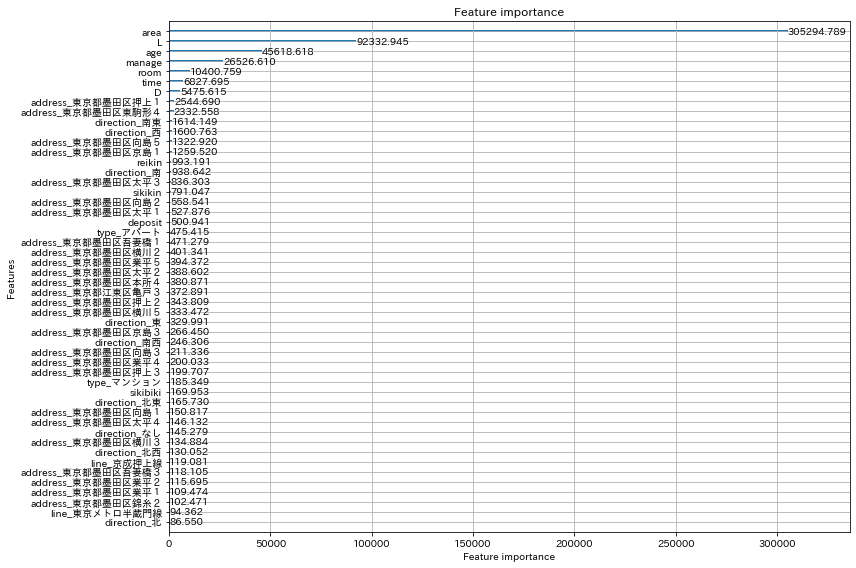

In [16]:
lgb.plot_importance(light, figsize=(12,8), max_num_features=50, importance_type='gain')
plt.tight_layout()
plt.show()

In [17]:
df2 = pd.read_csv('data/suumo_dum.csv')

In [18]:
X2 = df2[[col for col in df2.columns if col not in ['price']]].drop("name",axis=1)

In [19]:
y2 = df2["price"]

In [20]:
pred2 = light.predict(X2)

In [21]:
prediction_s=pd.Series(pred2,name="prediction")
df2["difference"]=df2["price"]-prediction_s
df2["prediction"]=prediction_s
df2 = df2.reindex(columns=["name","price","prediction","difference"])
# お得物件top10を表示
df2.sort_values(by="difference",ascending=True).head(10)

,name,price,prediction,difference
3790,平澤貸家,20.0,23.411206,-3.411206
14254,東武伊勢崎線 曳舟駅 2階建 築55年,9.0,12.183656,-3.183656
12352,藤和シティホームズ本所吾妻橋 101号室,20.0,23.150903,-3.150903
2392,亀戸天神リリエンハイム,11.0,13.927389,-2.927389
7598,東京メトロ半蔵門線 押上駅 4階建 築53年,4.5,6.957841,-2.457841
1626,大内荘 310号室,4.5,6.957841,-2.457841
1627,大内荘 310号室,4.5,6.957841,-2.457841
8526,亀戸2丁目団地8号棟,9.5,11.671683,-2.171683
3686,佐藤ハイツ 203号室,7.2,9.125129,-1.925129
2823,Forest Court,8.0,9.905351,-1.905351


In [22]:
train_pred = light.predict(X_train)

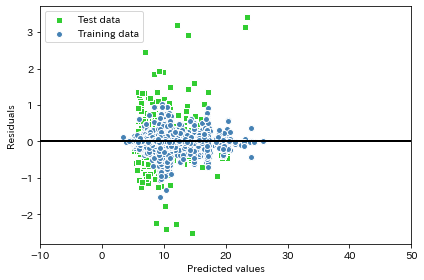

In [23]:

plt.scatter(pred,  pred - test_y,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.scatter(train_pred,  train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()

In [24]:
# 検証データ
r2_score(test_y, pred)

0.9900044381579846

In [25]:
# 検証データ
mean_squared_error(test_y, pred)

0.0981388442008372

In [26]:
import math
math.sqrt(mean_squared_error(test_y, pred))

0.3132711991243964

In [27]:
pred3=light.predict(X_val)

In [28]:
r2_score(y_val, pred3)

0.9924748944241708

In [29]:
mean_squared_error(y_val, pred3)

0.07590404372546988